# Ride Sharing: Dynamic Pricing

Muh Amri Sidiq

## Introduction

Dynamic pricing is a strategy where businesses adjust prices for products or services based on real-time factors such as demand, competition, time, and market conditions. This approach allows companies to maximize revenue and adapt to changing consumer behavior, making it a crucial component in industries like e-commerce, travel, and retail.

In this project, we aim to build a predictive model for dynamic pricing that leverages historical data and advanced machine learning techniques. By analyzing factors such as demand fluctuations, seasonal trends, customer preferences, and competitor pricing, our model seeks to provide optimal price recommendations in real time

## Import Data

To kickstart our project, we sourced the dataset directly from Kaggle, a hub for high-quality datasets and challenges. With a simple script, the data is downloaded and loaded into our environment, ready for exploration and analysis. This step ensures we have a robust starting point for building powerful machine learning models

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arashnic/dynamic-pricing-dataset")

print("Path to dataset files:", path)

100%|██████████| 21.8k/21.8k [00:00<00:00, 11.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/arashnic/dynamic-pricing-dataset/versions/1


## Import Library

In this step, we import essential Python libraries for data manipulation, visualization, and machine learning. Libraries like Pandas and NumPy power our data handling, Matplotlib and Seaborn enable insightful visualizations, while scikit-learn, Randomforest, XGBoost, GradientBoosting, AdaBoost and Decission Tree libraries provide robust tools for model development. These imports lay the groundwork for a seamless machine learning workflow

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_percentage_error
import shap
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Load Data

The dataset is loaded into a Pandas DataFrame for easy manipulation and exploration. At this stage, we ensure the data is structured correctly, ready for preprocessing and analysis. A quick preview using .head() gives us a snapshot of the data, helping to identify key columns and potential cleaning steps

In [4]:
# List files in the downloaded dataset folder
for file in os.listdir(path):
    print(file)

file_path = os.path.join(path, 'dynamic_pricing.csv')
df = pd.read_csv(file_path)

dynamic_pricing.csv


In [5]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


## Exploratory Data Analysis

EDA is a critical step in understanding the dataset. Using Python libraries like Pandas, Seaborn, and Matplotlib, we analyze distributions, identify patterns, and detect anomalies. Visualizations such as histograms, box plots, and heatmaps reveal relationships between features and the target variable, setting the stage for effective feature engineering and model building

In [7]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [8]:
df.describe(include = "object")

,Location_Category,Customer_Loyalty_Status,Time_of_Booking,Vehicle_Type
count,1000,1000,1000,1000
unique,3,3,4,2
top,Urban,Silver,Night,Premium
freq,346,367,276,522


Insight: count data is 1000 row and we have 10 column

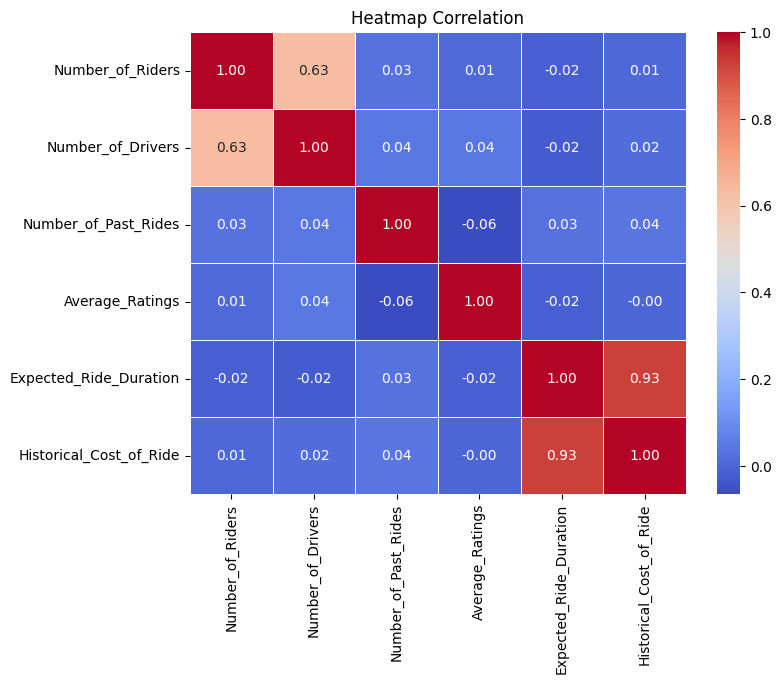

In [9]:
price_numeric = df.select_dtypes(include=['number'])

# Calculate correlation
corr_matrix = price_numeric.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Correlation")
plt.show()

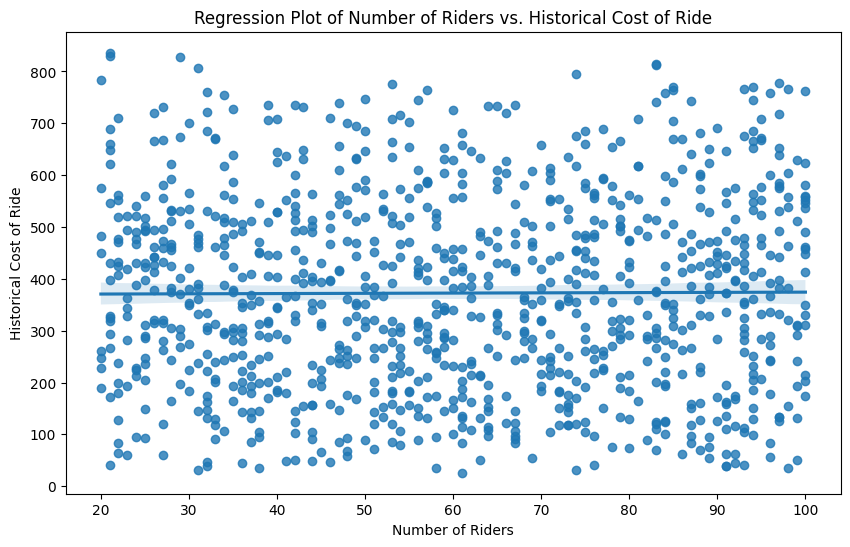

In [10]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Number_of_Riders', y='Historical_Cost_of_Ride', data=df)
plt.title('Regression Plot of Number of Riders vs. Historical Cost of Ride')
plt.xlabel('Number of Riders')
plt.ylabel('Historical Cost of Ride')
plt.show()

Insight: `Historical_Cost_of_Ride` not linier with `Number_of_Riders`

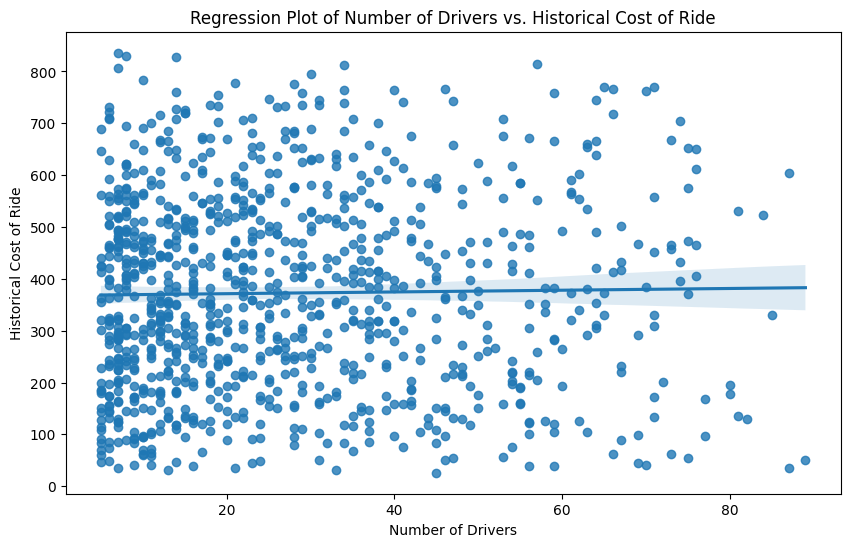

In [11]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Number_of_Drivers', y='Historical_Cost_of_Ride', data=df)
plt.title('Regression Plot of Number of Drivers vs. Historical Cost of Ride')
plt.xlabel('Number of Drivers')
plt.ylabel('Historical Cost of Ride')
plt.show()

Insight: `Historical_Cost_of_Ride` not linier with `Number_of_Drivers`

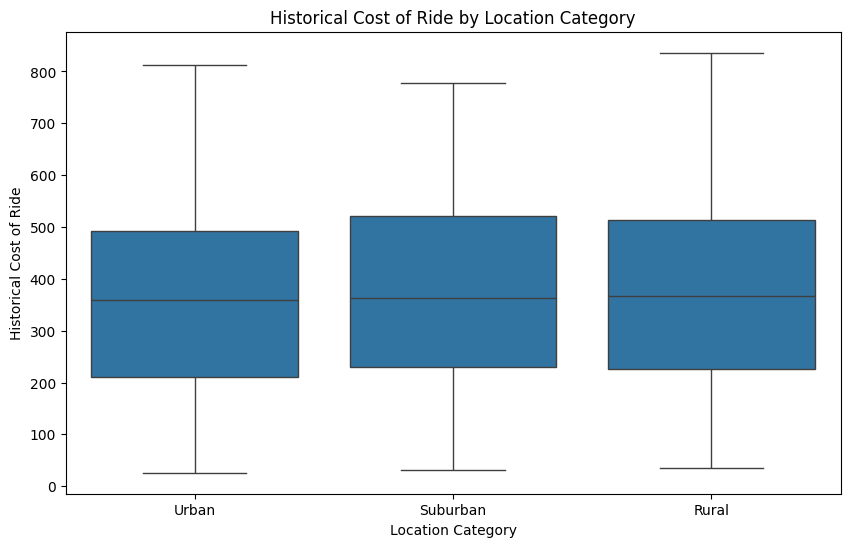

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location_Category', y='Historical_Cost_of_Ride', data=df)
plt.title('Historical Cost of Ride by Location Category')
plt.xlabel('Location Category')
plt.ylabel('Historical Cost of Ride')
plt.show()

Insight: all `Location_Category` almost same mean and median, buta Suburban have mean higher value than other

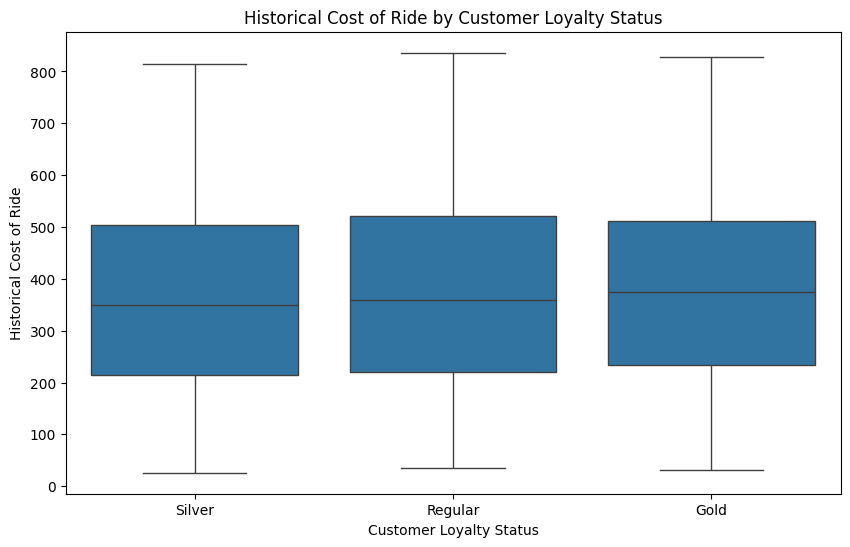

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Customer_Loyalty_Status', y='Historical_Cost_of_Ride', data=df)
plt.title('Historical Cost of Ride by Customer Loyalty Status')
plt.xlabel('Customer Loyalty Status')
plt.ylabel('Historical Cost of Ride')
plt.show()

Insight: `Customer_Loyalty_Status` type Reguler have mean `Historical_Cost_of_Ride` higher than others, and median `Historical_Cost_of_Ride` highest is Gold

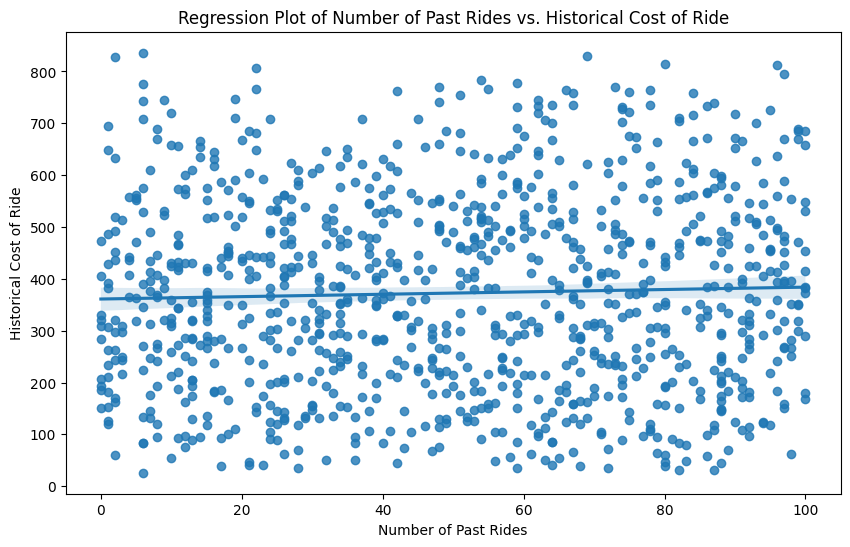

In [14]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Number_of_Past_Rides', y='Historical_Cost_of_Ride', data=df)
plt.title('Regression Plot of Number of Past Rides vs. Historical Cost of Ride')
plt.xlabel('Number of Past Rides')
plt.ylabel('Historical Cost of Ride')
plt.show()

Insight: `Historical_Cost_of_Ride` not linier with `Number_of_Past_Rides`

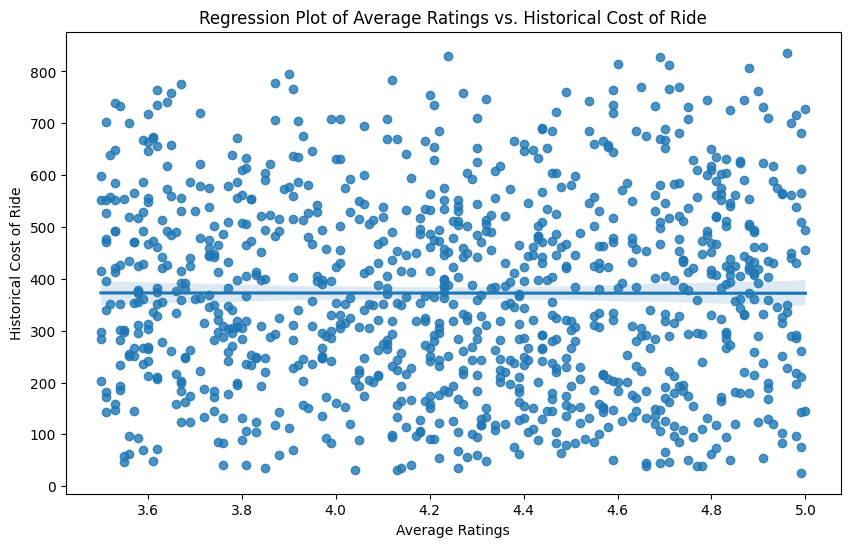

In [15]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Average_Ratings', y='Historical_Cost_of_Ride', data=df)
plt.title('Regression Plot of Average Ratings vs. Historical Cost of Ride')
plt.xlabel('Average Ratings')
plt.ylabel('Historical Cost of Ride')
plt.show()

Insight: `Historical_Cost_of_Ride` not linier with `Average_Ratings`



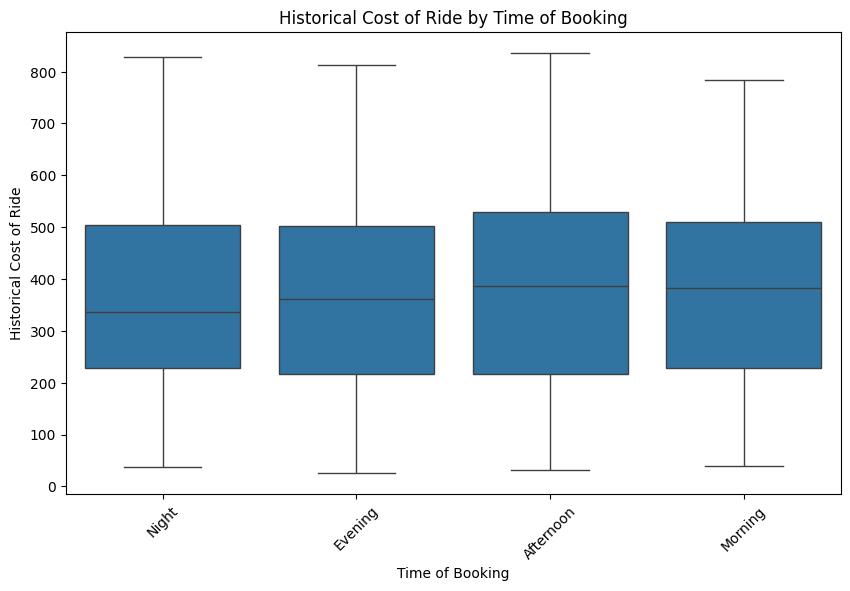

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Time_of_Booking', y='Historical_Cost_of_Ride', data=df)
plt.title('Historical Cost of Ride by Time of Booking')
plt.xlabel('Time of Booking')
plt.ylabel('Historical Cost of Ride')
plt.xticks(rotation=45)
plt.show()

Insight: `Time_of_Booking` type Afternoon have mean and median `Historical_Cost_of_Ride` highest

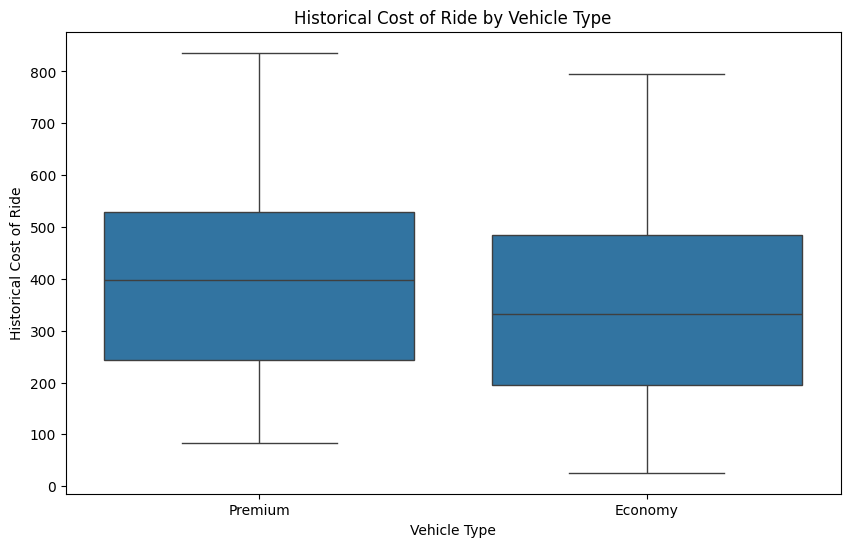

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vehicle_Type', y='Historical_Cost_of_Ride', data=df)
plt.title('Historical Cost of Ride by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Historical Cost of Ride')
plt.show()


Insight: `Vehicle_Type` type Economy have mean `Historical_Cost_of_Ride` higher than other

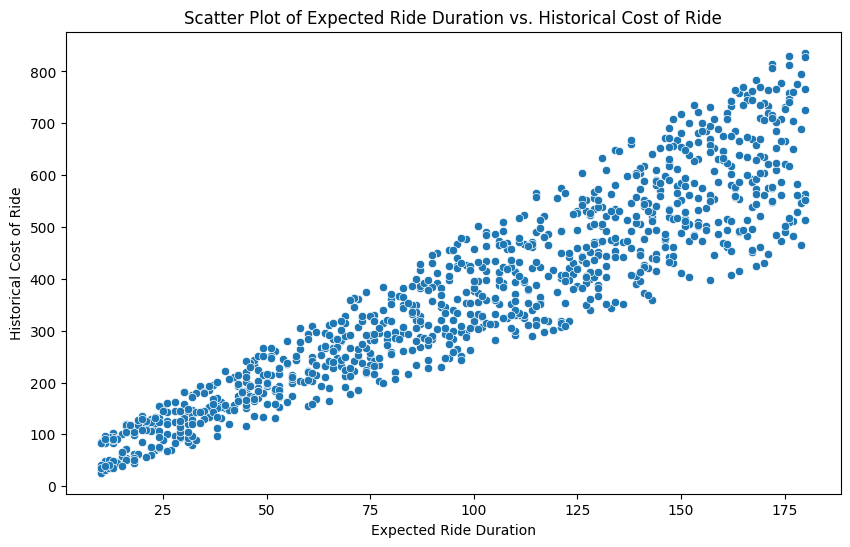

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Expected_Ride_Duration', y='Historical_Cost_of_Ride', data=df)
plt.title('Scatter Plot of Expected Ride Duration vs. Historical Cost of Ride')
plt.xlabel('Expected Ride Duration')
plt.ylabel('Historical Cost of Ride')
plt.show()

Insight: `Historical_Cost_of_Ride` linier with `Expected_Ride_Duration`

## Feature Engineering

Find ratio between `Number_of_Riders` and `Number_of_Drivers`

In [19]:
df['Demand_Supply_Ratio'] = df['Number_of_Riders'] / (df['Number_of_Drivers'] + 1)
df['Ride_Experience_Level'] = pd.cut(df['Number_of_Past_Rides'], bins=[-1, 5, 20, 50, 1000], labels=['New', 'Low', 'Medium', 'High'])
df['Rating_Level'] = pd.cut(df['Average_Ratings'], bins=[0, 3, 4, 5], labels=['Low', 'Medium', 'High'])

## Preparation Data

Clean, well-structured data is key to building effective models. In this step, we handle missing values. This meticulous preparation ensures the dataset is ready for accurate and reliable machine learning predictions

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Number_of_Riders         1000 non-null   int64   
 1   Number_of_Drivers        1000 non-null   int64   
 2   Location_Category        1000 non-null   object  
 3   Customer_Loyalty_Status  1000 non-null   object  
 4   Number_of_Past_Rides     1000 non-null   int64   
 5   Average_Ratings          1000 non-null   float64 
 6   Time_of_Booking          1000 non-null   object  
 7   Vehicle_Type             1000 non-null   object  
 8   Expected_Ride_Duration   1000 non-null   int64   
 9   Historical_Cost_of_Ride  1000 non-null   float64 
 10  Demand_Supply_Ratio      1000 non-null   float64 
 11  Ride_Experience_Level    1000 non-null   category
 12  Rating_Level             1000 non-null   category
dtypes: category(2), float64(3), int64(4), object(4)
memory usage: 88

In [21]:
df.isnull().sum()

,0
Number_of_Riders,0
Number_of_Drivers,0
Location_Category,0
Customer_Loyalty_Status,0
Number_of_Past_Rides,0
Average_Ratings,0
Time_of_Booking,0
Vehicle_Type,0
Expected_Ride_Duration,0
Historical_Cost_of_Ride,0


Insight: From above prompt no have missing values

Change data type object to encoder

In [22]:
le = LabelEncoder()

# Iterate through each column in the DataFrame
for col in df.columns:
    # Check if the column is of type object or category
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        # Fit and transform the column using LabelEncoder
        df[col] = le.fit_transform(df[col].astype(str))

separate target and feature, x for target and y for feature

In [23]:
x = df.drop(['Historical_Cost_of_Ride'], axis=1)
y = df['Historical_Cost_of_Ride']

## K-Fold Cross Validation

K-Fold Cross-Validation splits the dataset into multiple folds, training the model on different subsets and testing on unseen data. This technique minimizes overfitting and provides a comprehensive evaluation of model performance. By leveraging Python’s scikit-learn, we ensure that our model is both robust and generalizes well to new data

In [24]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, test_idx in kf.split(x):
    x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

## Modeling

In this phase, we develop and fine-tune machine learning models using powerful algorithms like XGBoost, gradientboosting, adaboost, decission tree and Randomforest. With Python’s scikit-learn and other ML libraries, we train models, and evaluate their performance. The goal: a model that mean absolute percentage error to deliver actionable insights

### XGBoost

XGBoost (Extreme Gradient Boosting) is a powerful and efficient machine learning algorithm widely used for both regression and classification tasks. Built on the principles of gradient boosting, XGBoost enhances predictive performance by iteratively improving weak learners (usually decision trees) and optimizing a loss function tailored to the problem at hand

In [25]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(x_train, y_train)

xgb_pred = xgb_model.predict(x_test)

xgb_mape = mean_absolute_percentage_error(y_test, xgb_pred)
print("XGBoost MAPE:", xgb_mape)

XGBoost MAPE: 0.14988513249389043


Insight: from basic model XGBoost we have MAPE 0.149/ 14.9%

In [26]:
# TreeExplainer for xgboost
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(x_test)

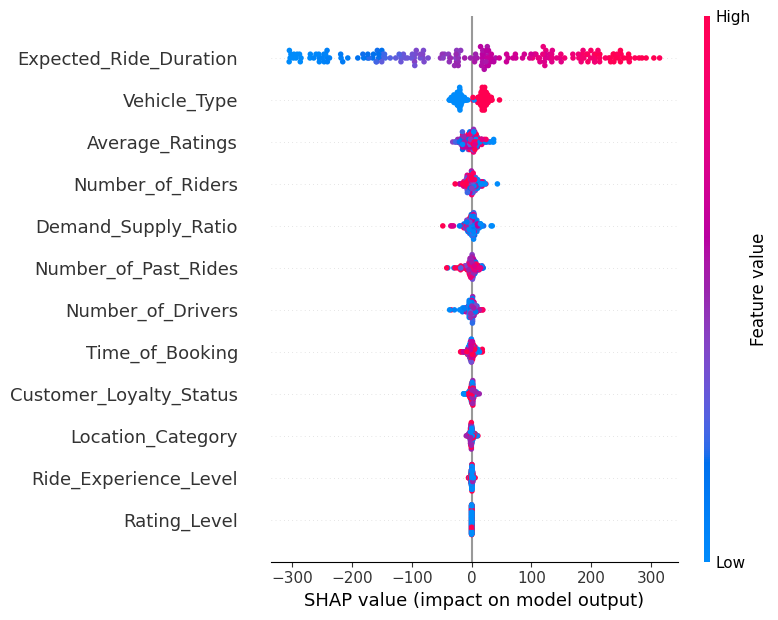

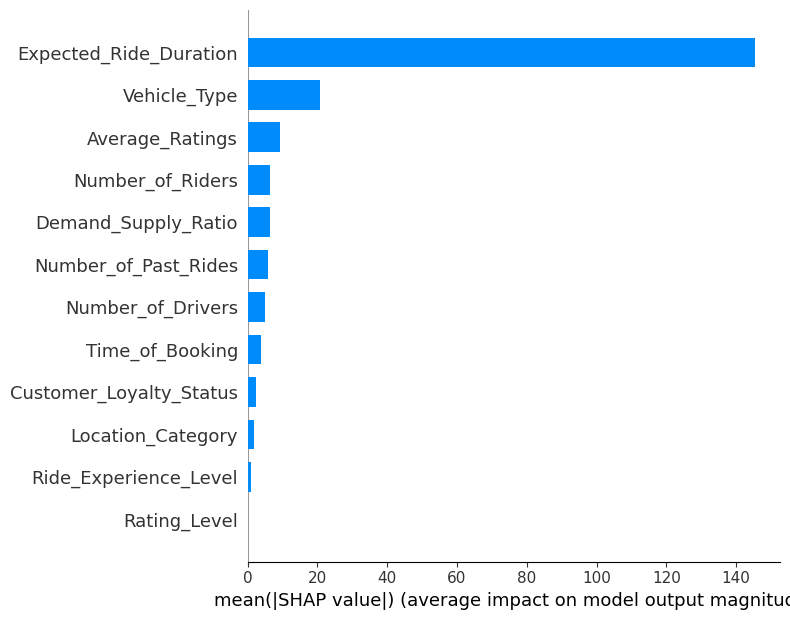

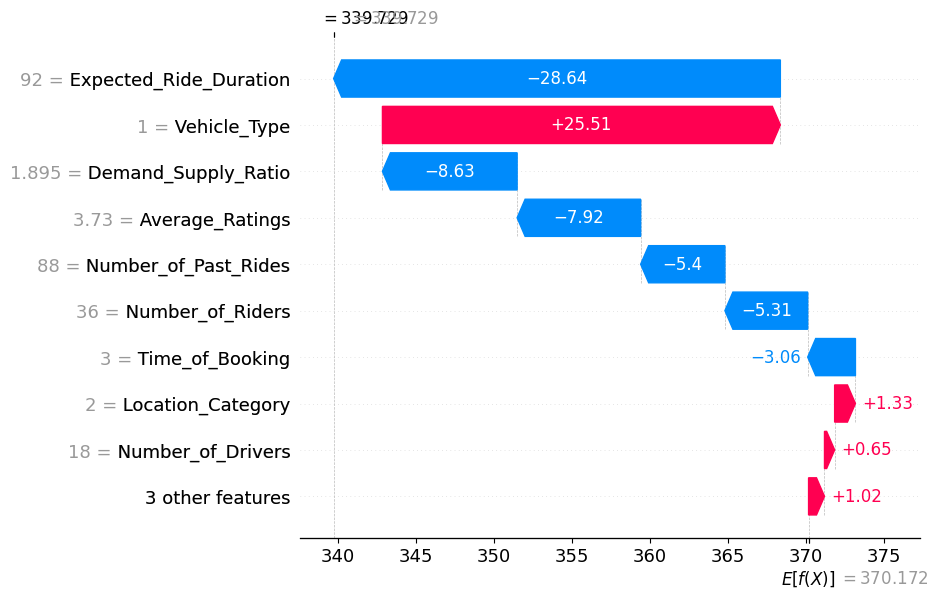

In [28]:
# SHAP summary plot
shap.summary_plot(shap_values_xgb, x_test)

# Bar plot of the most important features
shap.summary_plot(shap_values_xgb, x_test, plot_type="bar")

# Individualized explanation (e.g. 10th data)
shap.plots.waterfall(shap.Explanation(values=shap_values_xgb[10],
                                      base_values=explainer_xgb.expected_value,
                                      data=x_test.iloc[10]))

Insight: `Expected_Ride_Duration` and `Vehicle_Type` have highest feature importance, but from waterfall plot `Expected_Ride_Duration` decrease prediction value -28.64 and `Vehicle_Type` increase prediction value 25.51.

                    Feature  Importance
8    Expected_Ride_Duration    0.788547
7              Vehicle_Type    0.077388
9       Demand_Supply_Ratio    0.020643
6           Time_of_Booking    0.020553
5           Average_Ratings    0.017576
4      Number_of_Past_Rides    0.016035
2         Location_Category    0.015954
1         Number_of_Drivers    0.012359
10    Ride_Experience_Level    0.011901
0          Number_of_Riders    0.010490
3   Customer_Loyalty_Status    0.008553
11             Rating_Level    0.000000


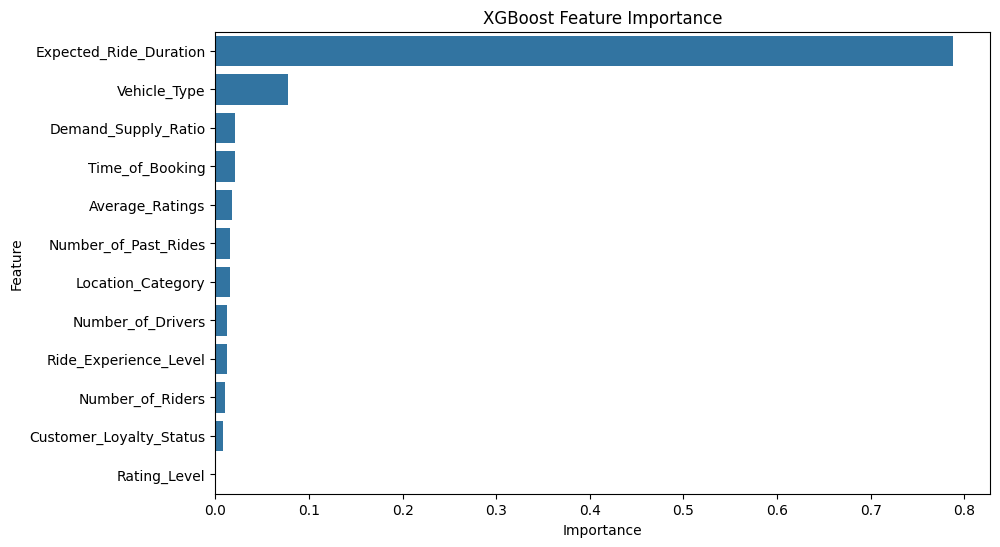

In [29]:
xgb_feature_importance = xgb_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': xgb_feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Insight: fetaure importance highest is `Expected_Ride_Duration`, and lowest is `Rating_level`

### Random Forest

The Random Forest Regressor is a versatile and robust machine learning algorithm widely used for regression tasks, where the goal is to predict continuous numerical outcomes. Developed as an ensemble method, Random Forest combines the predictions of multiple decision trees to improve accuracy, stability, and generalization.

In [30]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)

rf_pred = rf_model.predict(x_test)

rf_mape = mean_absolute_percentage_error(y_test, rf_pred)
print("Random Forest MAPE:", rf_mape)

Random Forest MAPE: 0.13555024783362868


Insight: from basic model Random Forest we have MAPE 0.135/ 13.5%

In [32]:
# TreeExplainer for RandomForest
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(x_test)

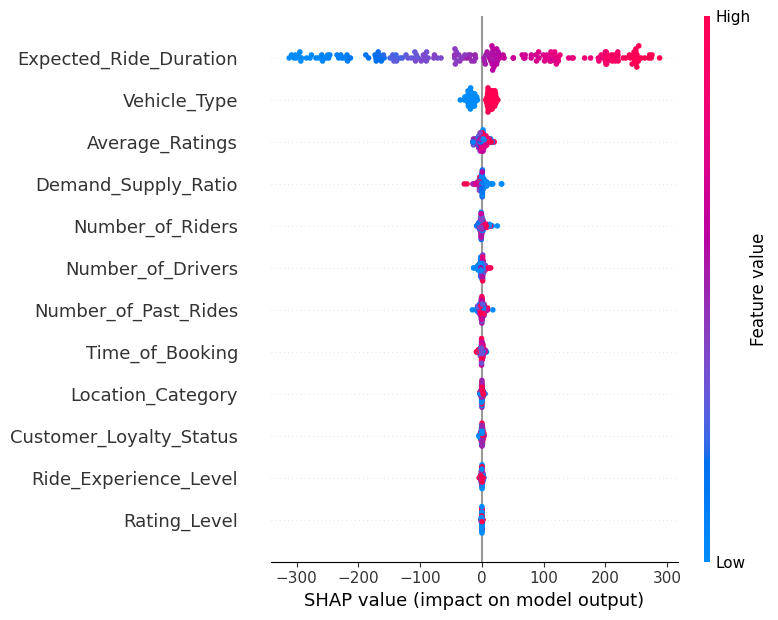

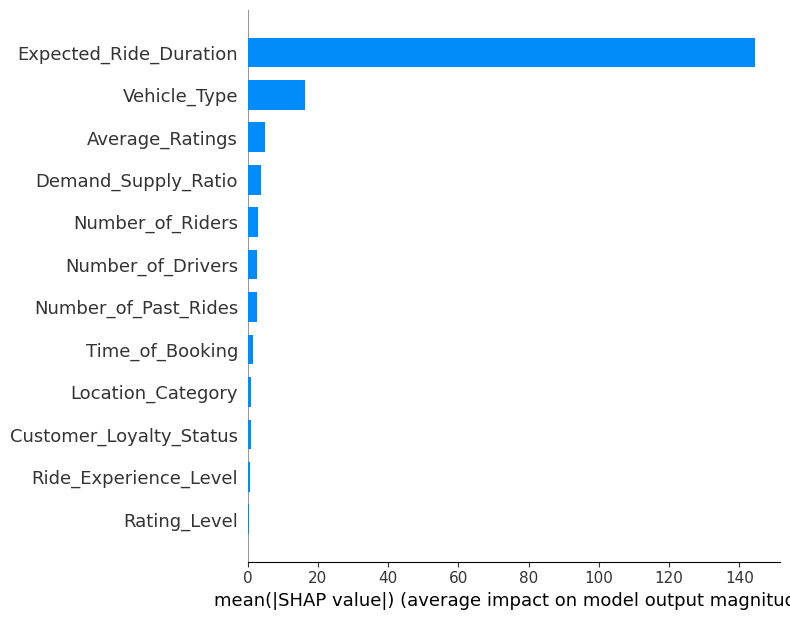

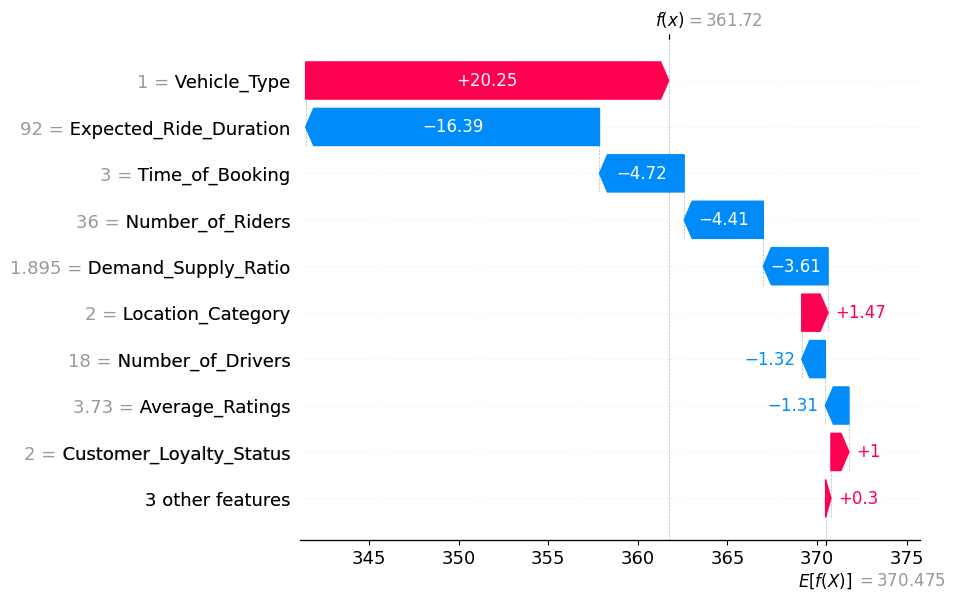

In [33]:
# SHAP summary plot
shap.summary_plot(shap_values_rf, x_test)

# Bar plot of the most important features
shap.summary_plot(shap_values_rf, x_test, plot_type="bar")

# Individualized explanation (e.g. 10th data)
shap.plots.waterfall(shap.Explanation(values=shap_values_rf[10],
                                      base_values=explainer_rf.expected_value,
                                      data=x_test.iloc[10]))

Insight: `Expected_Ride_Duration` and `Vehicle_Type` have highest feature importance, but from waterfall plot `Expected_Ride_Duration` decrease prediction value -16.39 and `Vehicle_Type` increase prediction value 20.25.

                    Feature  Importance
8    Expected_Ride_Duration    0.878766
5           Average_Ratings    0.020977
9       Demand_Supply_Ratio    0.018807
4      Number_of_Past_Rides    0.018137
0          Number_of_Riders    0.016174
1         Number_of_Drivers    0.014573
7              Vehicle_Type    0.013470
6           Time_of_Booking    0.006529
2         Location_Category    0.004585
3   Customer_Loyalty_Status    0.004255
10    Ride_Experience_Level    0.002934
11             Rating_Level    0.000794


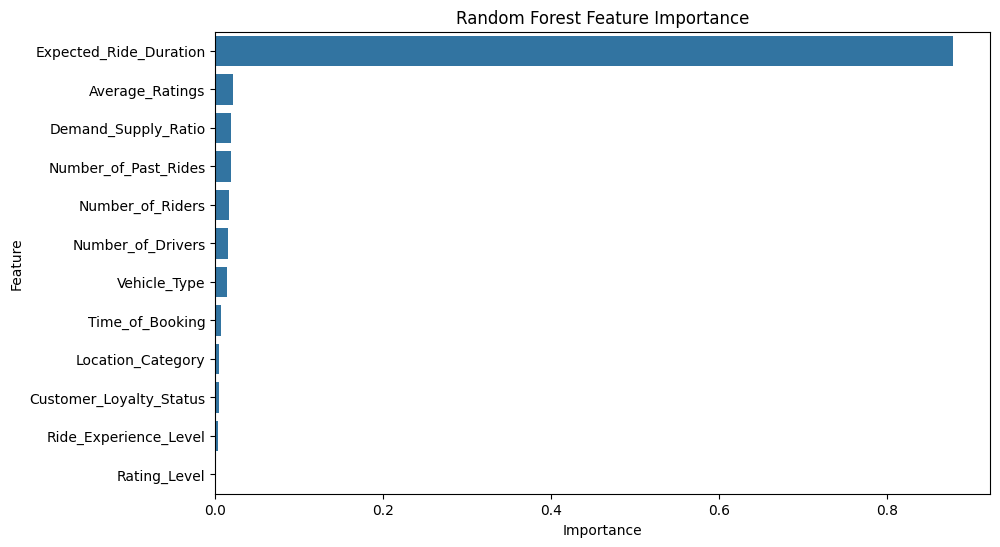

In [34]:
rf_feature_importance = rf_model.feature_importances_

# Create a DataFrame for better visualization
rf_feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': rf_feature_importance})
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(rf_feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance_df)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Insight: fetaure importance highest is `Expected_Ride_Duration`, and lowest is `Rating_Level`

### Gradient Boosting

The Gradient Boosting Regressor is a powerful machine learning algorithm designed for predictive modeling tasks involving continuous numerical outputs. It is based on the principle of boosting, where multiple weak learners (typically decision trees) are sequentially combined to create a strong predictive model. Each new learner focuses on correcting the errors of its predecessors by minimizing a specified loss function

In [35]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(x_train, y_train)

gb_pred = gb_model.predict(x_test)

gb_mape = mean_absolute_percentage_error(y_test, gb_pred)
print("Gradient Boosting MAPE:", gb_mape)

Gradient Boosting MAPE: 0.13489661544823353


Insight: from basic model Gradient Boosting we have MAPE 0.134/ 13.4%

In [36]:
# TreeExplainer for GradientBoosting
explainer_gb = shap.TreeExplainer(gb_model)
shap_values_gb = explainer_gb.shap_values(x_test)

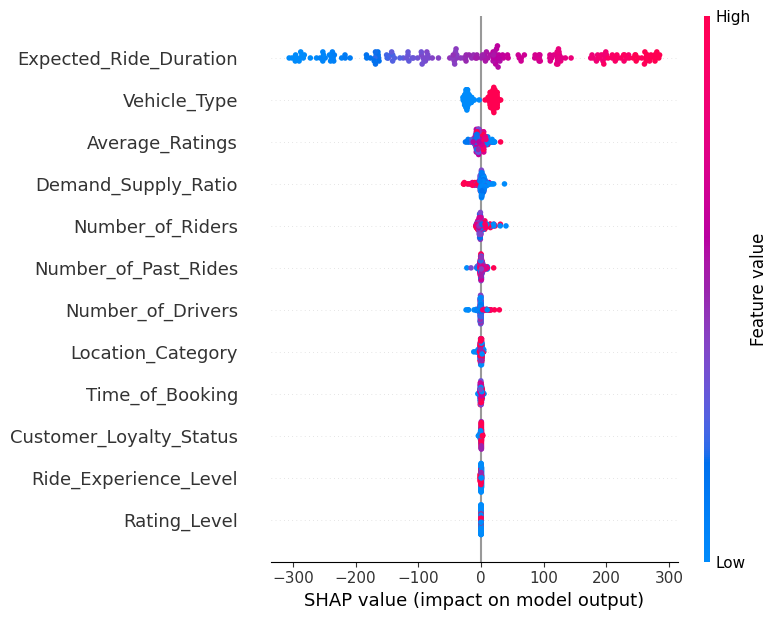

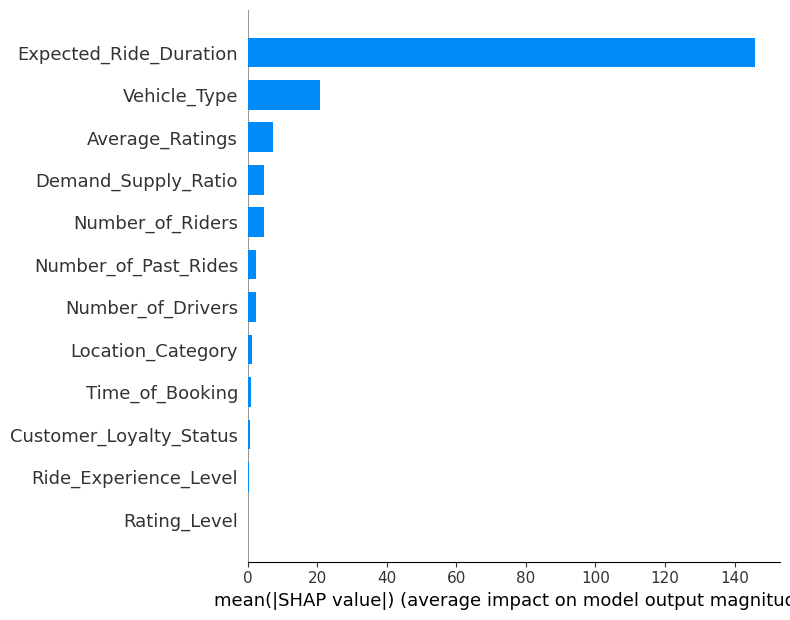

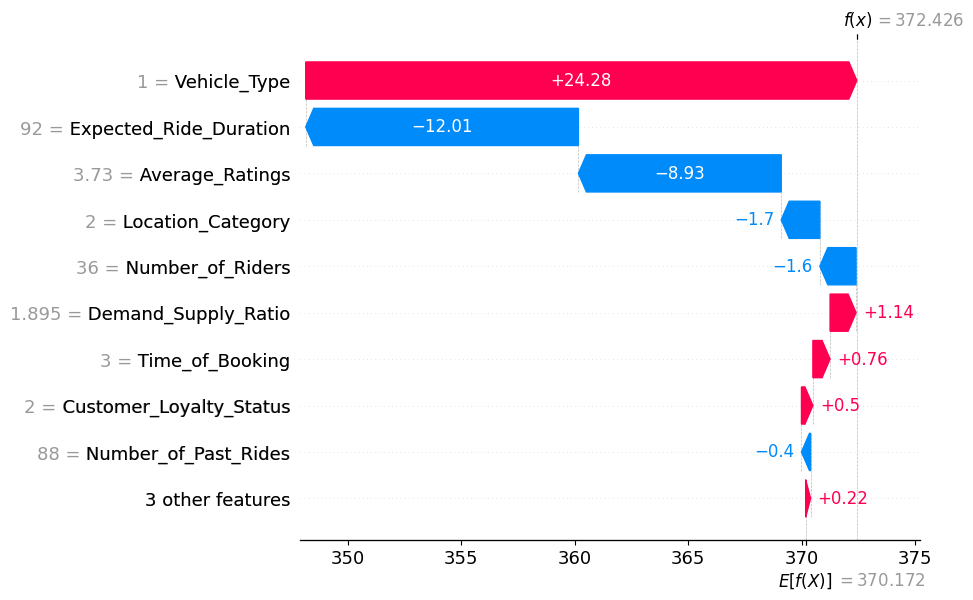

In [37]:
# SHAP summary plot
shap.summary_plot(shap_values_gb, x_test)

# Bar plot of the most important features
shap.summary_plot(shap_values_gb, x_test, plot_type="bar")

# Individualized explanation (e.g. 10th data)
shap.plots.waterfall(shap.Explanation(values=shap_values_gb[10],
                                      base_values=explainer_gb.expected_value,
                                      data=x_test.iloc[10]))

Insight: `Expected_Ride_Duration` and `Vehicle_Type` have highest feature importance, but from waterfall plot `Expected_Ride_Duration` decrease prediction value -12.1 and `Vehicle_Type` increase prediction value 24.28.

                    Feature  Importance
8    Expected_Ride_Duration    0.942666
7              Vehicle_Type    0.016121
5           Average_Ratings    0.010700
9       Demand_Supply_Ratio    0.009047
0          Number_of_Riders    0.006260
1         Number_of_Drivers    0.006138
4      Number_of_Past_Rides    0.005361
6           Time_of_Booking    0.001606
2         Location_Category    0.001441
3   Customer_Loyalty_Status    0.000370
10    Ride_Experience_Level    0.000287
11             Rating_Level    0.000003


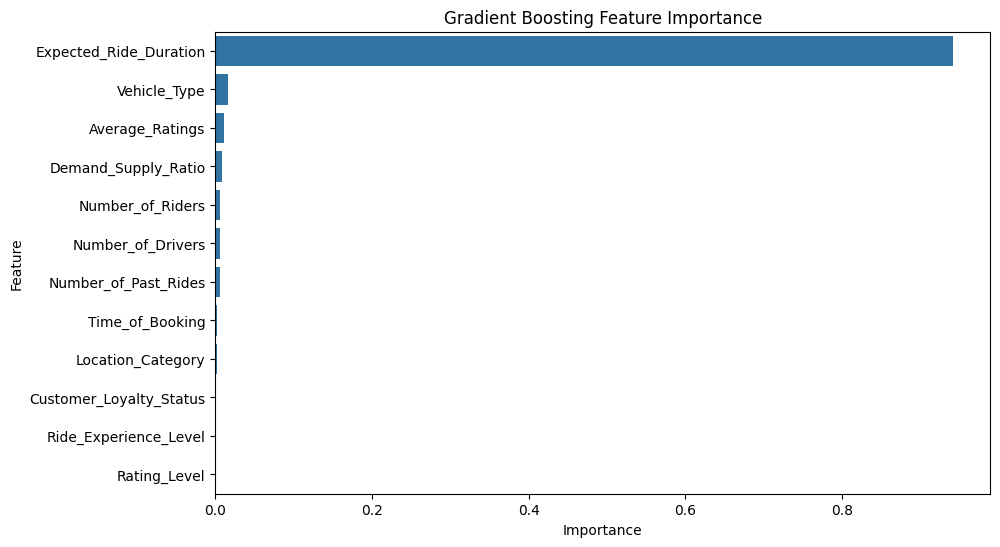

In [38]:
gb_feature_importance = gb_model.feature_importances_

# Create a DataFrame for better visualization
gb_feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': gb_feature_importance})
gb_feature_importance_df = gb_feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(gb_feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=gb_feature_importance_df)
plt.title('Gradient Boosting Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Insight: fetaure importance highest is `Expected_Ride_Duration`, and lowest is `Rating_Level`

### Ada Boost

The AdaBoost (Adaptive Boosting) Regressor is a machine learning algorithm that combines the power of multiple weak learners, typically decision trees, to build a strong predictive model. It works by iteratively adjusting the weights of the training samples, focusing more on examples where previous models performed poorly. This adaptive mechanism allows AdaBoost to improve accuracy and reduce errors over successive iterations

In [39]:
ada_model = AdaBoostRegressor(random_state=42)
ada_model.fit(x_train, y_train)

ada_pred = ada_model.predict(x_test)

ada_mape = mean_absolute_percentage_error(y_test, ada_pred)
print("AdaBoost MAPE:", ada_mape)

AdaBoost MAPE: 0.1648875507982399


Insight: from basic model Adaptive Boosting we have MAPE 0.164/ 16.4%

  0%|          | 0/10 [00:00<?, ?it/s]

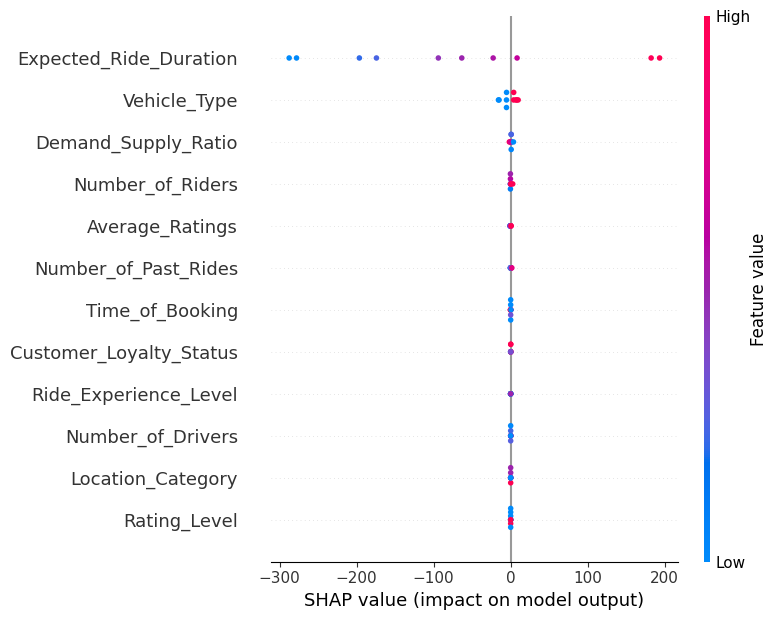

In [44]:
# Use partial data (for efficiency)
background = shap.sample(x_train, 100)

explainer_ada = shap.KernelExplainer(ada_model.predict, background)
shap_values_ada = explainer_ada.shap_values(x_test[:10])  # take some first for efficiency

# Visualisasi
shap.summary_plot(shap_values_ada, x_test[:10])

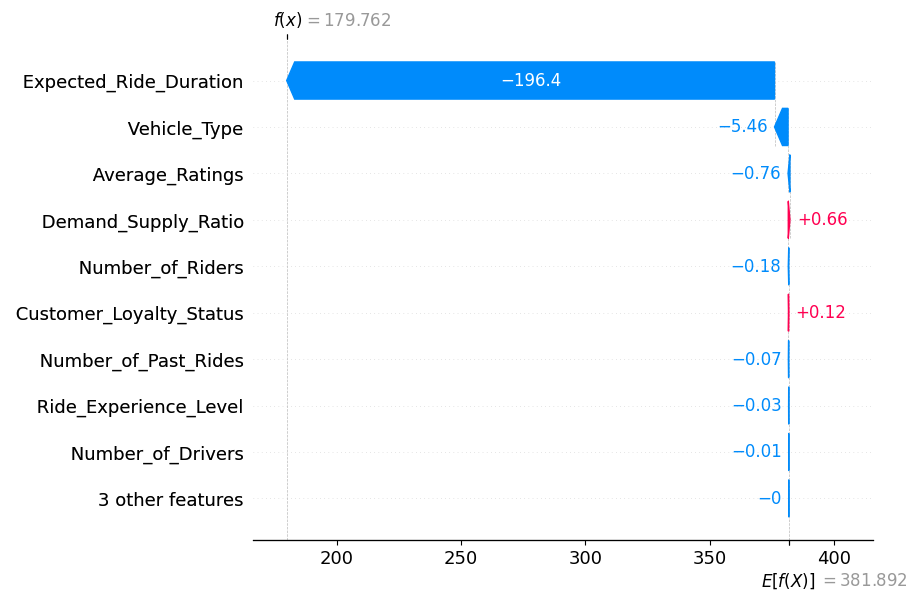

In [45]:
shap.plots._waterfall.waterfall_legacy(
    explainer_ada.expected_value,
    shap_values_ada[0],
    feature_names=x_test.columns,
    features=x_test.iloc[0])

Insight: `Expected_Ride_Duration` and `Vehicle_Type` have highest feature importance, but from waterfall plot `Expected_Ride_Duration` decrease prediction value -196.4 and `Vehicle_Type` decrease prediction value -5.46.

                    Feature  Importance
8    Expected_Ride_Duration    0.927070
7              Vehicle_Type    0.029347
5           Average_Ratings    0.015478
9       Demand_Supply_Ratio    0.010623
0          Number_of_Riders    0.006385
4      Number_of_Past_Rides    0.005020
3   Customer_Loyalty_Status    0.002782
2         Location_Category    0.001542
6           Time_of_Booking    0.001334
10    Ride_Experience_Level    0.000419
1         Number_of_Drivers    0.000000
11             Rating_Level    0.000000


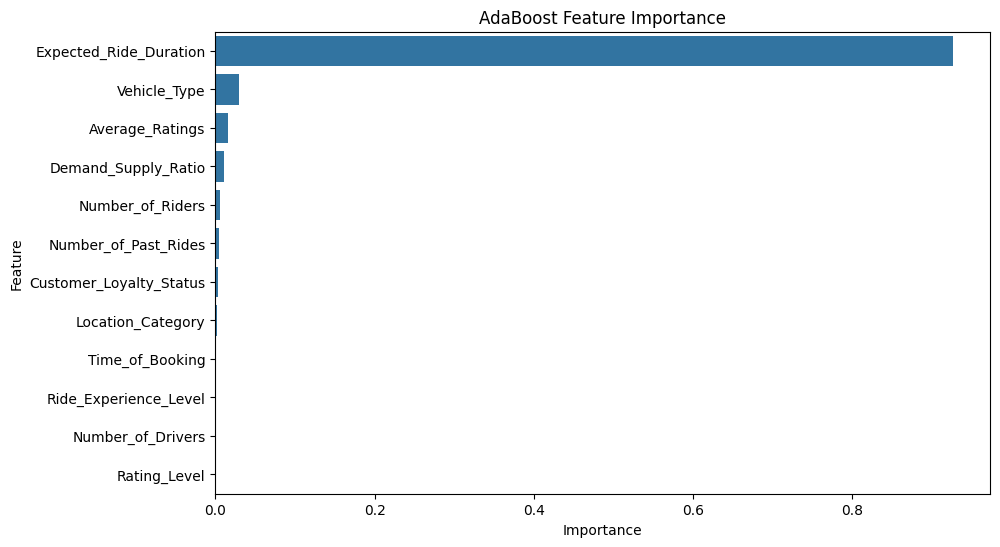

In [46]:
ada_feature_importance = ada_model.feature_importances_

# Create a DataFrame for better visualization
ada_feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': ada_feature_importance})
ada_feature_importance_df = ada_feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(ada_feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=ada_feature_importance_df)
plt.title('AdaBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Insight: fetaure importance highest is `Expected_Ride_Duration`, and lowest is `Rating_Level`

### Decission Tree

The Decision Tree Regressor is a straightforward yet powerful machine learning algorithm used for regression tasks, where the goal is to predict continuous numerical values. It operates by recursively splitting the dataset into smaller subsets based on the most significant features, creating a tree-like structure that represents decision rules

In [47]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)

dt_pred = dt_model.predict(x_test)

dt_mape = mean_absolute_percentage_error(y_test, dt_pred)
print("Decision Tree MAPE:", dt_mape)

Decision Tree MAPE: 0.18016746437050607


Insight: from basic model Decission Tree we have MAPE 0.18/ 18%

In [48]:
# TreeExplainer for Decision Tree
explainer_dt = shap.TreeExplainer(dt_model)
shap_values_dt = explainer_dt.shap_values(x_test)

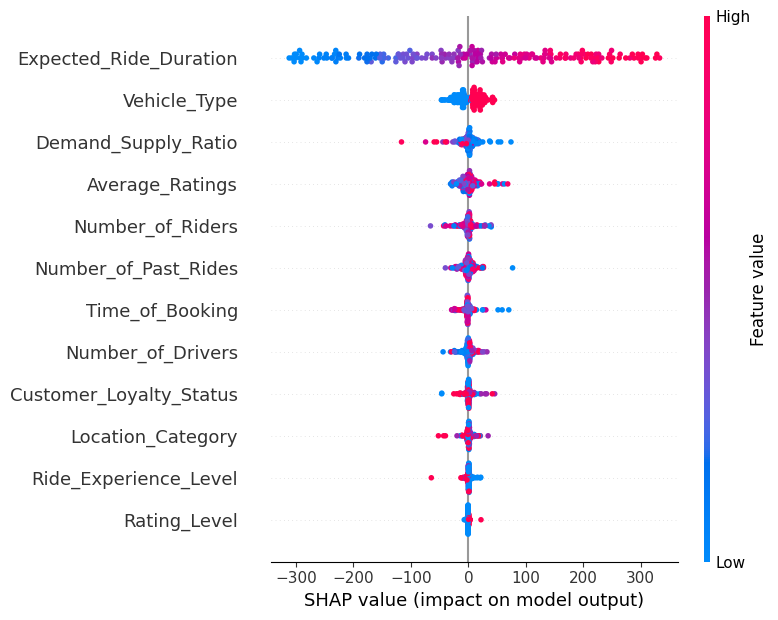

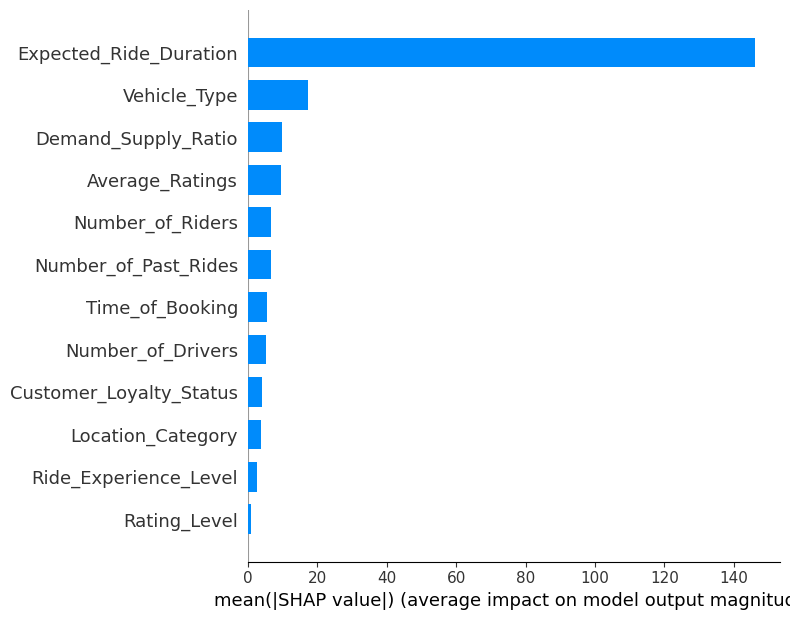

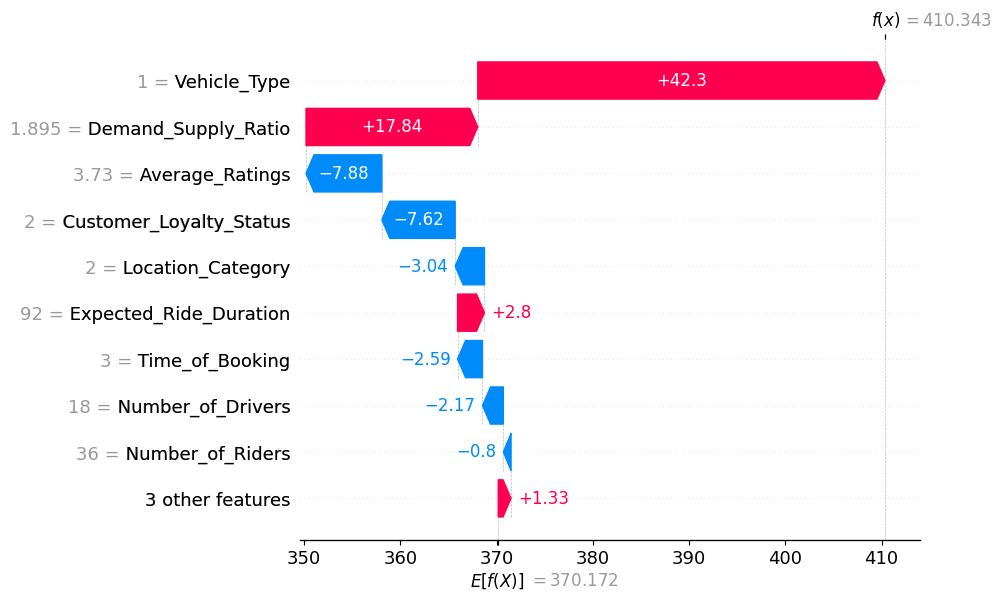

In [49]:
# SHAP summary plot
shap.summary_plot(shap_values_dt, x_test)

# Bar plot of the most important features
shap.summary_plot(shap_values_dt, x_test, plot_type="bar")

# Individualized explanation (e.g. 10th data)
shap.plots.waterfall(shap.Explanation(values=shap_values_dt[10],
                                      base_values=explainer_dt.expected_value,
                                      data=x_test.iloc[10]))

Insight: `Expected_Ride_Duration` and `Vehicle_Type` have highest feature importance, but from waterfall plot `Expected_Ride_Duration` increase prediction value 42.3 and `Vehicle_Type` increase prediction value 17.84.

                    Feature  Importance
8    Expected_Ride_Duration    0.873221
0          Number_of_Riders    0.023589
5           Average_Ratings    0.021278
9       Demand_Supply_Ratio    0.020119
4      Number_of_Past_Rides    0.018809
7              Vehicle_Type    0.015901
1         Number_of_Drivers    0.008586
2         Location_Category    0.005639
6           Time_of_Booking    0.005089
3   Customer_Loyalty_Status    0.005057
10    Ride_Experience_Level    0.001719
11             Rating_Level    0.000993


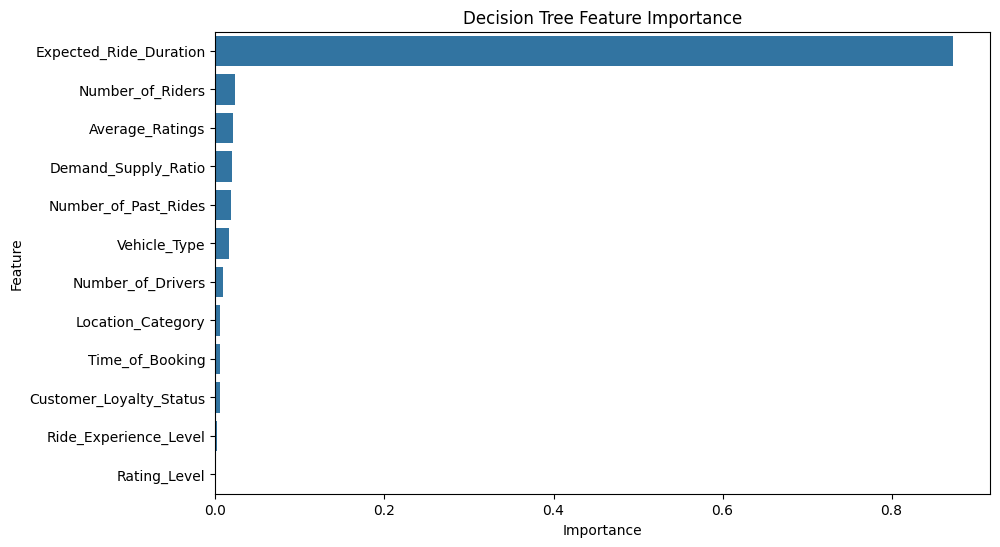

In [50]:
dt_feature_importance = dt_model.feature_importances_

# Create a DataFrame for better visualization
dt_feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': dt_feature_importance})
dt_feature_importance_df = dt_feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(dt_feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=dt_feature_importance_df)
plt.title('Decision Tree Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Insight: fetaure importance highest is `Expected_Ride_Duration`, and lowest is `Rating_Level`

Compare All Mean absolute percentage error

In [51]:
mape_scores = {
    "XGBoost": xgb_mape,
    "Random Forest": rf_mape,
    "Gradient Boosting": gb_mape,
    "AdaBoost": ada_mape,
    "Decision Tree": dt_mape
}

# Find the model with the lowest MAPE
best_model = min(mape_scores, key=mape_scores.get)
best_mape = mape_scores[best_model]

# Print the MAPE scores for all models
print("\nMAPE Scores:")
for model, mape in mape_scores.items():
    print(f"{model}: {mape}")

# Print the best model and its MAPE
print(f"\nBest Model: {best_model} with MAPE: {best_mape}")


MAPE Scores:
XGBoost: 0.14988513249389043
Random Forest: 0.13555024783362868
Gradient Boosting: 0.13489661544823353
AdaBoost: 0.1648875507982399
Decision Tree: 0.18016746437050607

Best Model: Gradient Boosting with MAPE: 0.13489661544823353


Best Model with MAPE smallest is Gradient Boosting 0.134/ 13.4%

## Hyperparameter Tuning

Model tuning is a critical step in the machine learning pipeline that focuses on optimizing a model's performance by fine-tuning its hyperparameters. Hyperparameters are settings that control the learning process and model behavior, such as the depth of a decision tree, the number of estimators in an ensemble method, or the learning rate in gradient boosting models. Proper tuning ensures that the model generalizes well to unseen data, balancing bias and variance effectively

### XGBoost Tuning



Tuning an XGBoost model involves optimizing its hyperparameters to achieve the best possible predictive performance. XGBoost (Extreme Gradient Boosting) offers a wide range of hyperparameters that control various aspects of the learning process, such as tree depth, learning rate, and data sampling. Proper tuning ensures the model balances bias and variance, enhancing its accuracy and robustness for the task at hand.
In this project, we performed hyperparameter tuning on an XGBoost regressor to optimize its performance for `Historical_Cost_of_Ride`. The final model was configured with the following parameters:

 - max_depth: 3 (controls the maximum depth of each decision tree, helping prevent overfitting).
 - min_child_weight: 1 (ensures minimum instance weight in a child node, affecting tree pruning).
 - n_estimators: 200 (specifies the number of boosting rounds).
 - learning_rate: 0.1 (determines the step size at each iteration, balancing convergence speed and accuracy).
 - subsample: 0.8 (randomly samples a fraction of the training data for each tree to prevent overfitting).
 - colsample_bytree: 0.8 (controls the fraction of features sampled for tree construction).
 - gamma: 0.1 (regularization term to control node splitting).
 - random_state: 42 (ensures reproducibility).

In [52]:
final_model_xgb = XGBRegressor(
    max_depth=3,
    min_child_weight=1,
    n_estimators=200,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    random_state=42)
final_model_xgb.fit(x_train, y_train)
final_pred_xgb = final_model_xgb.predict(x_test)
final_mape_xgb = mean_absolute_percentage_error(y_test, final_pred_xgb)
print("Final XGBoost MAPE:", final_mape_xgb)

Final XGBoost MAPE: 0.14799520994689863


Insight: from tuning model XGBoost we have MAPE 0.1479/ 14.8%

In [53]:
# TreeExplainer for tree-based models like XGBoost
explainer_xgb_tune = shap.TreeExplainer(final_model_xgb)
shap_values_xgb_tune = explainer_xgb_tune.shap_values(x_test)

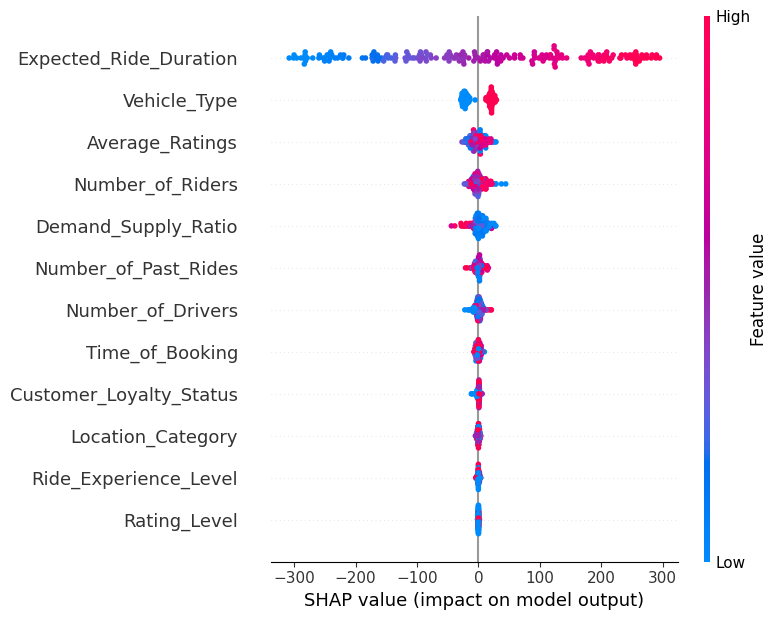

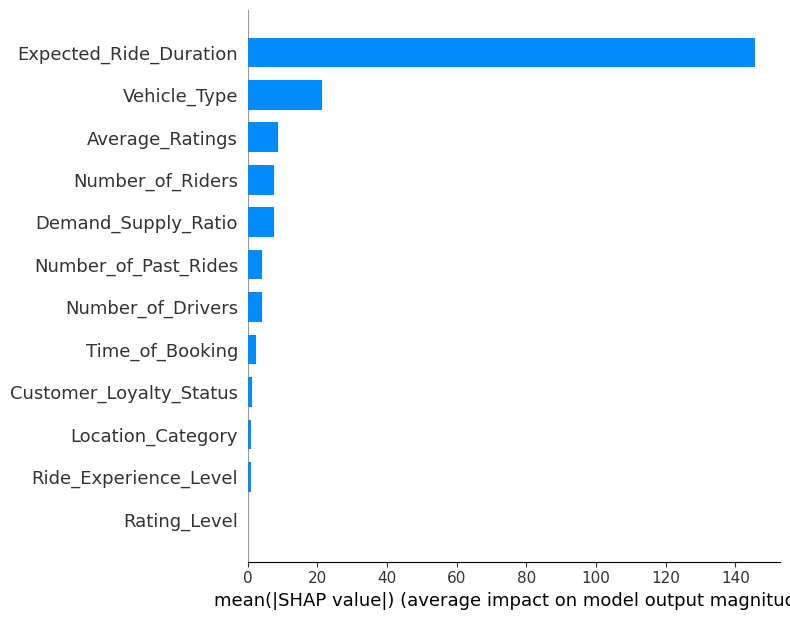

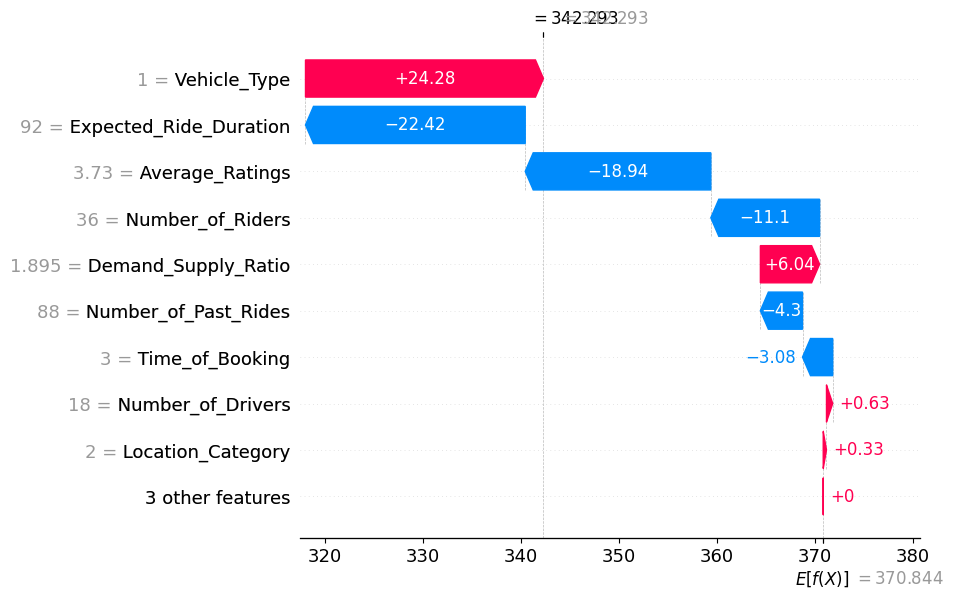

In [54]:
# SHAP summary plot
shap.summary_plot(shap_values_xgb_tune, x_test)

# Bar plot of the most important features
shap.summary_plot(shap_values_xgb_tune, x_test, plot_type="bar")

# Individualized explanation (e.g. 10th data)
shap.plots.waterfall(shap.Explanation(values=shap_values_xgb_tune[10],
                                      base_values=explainer_xgb_tune.expected_value,
                                      data=x_test.iloc[10]))

Insight: `Expected_Ride_Duration` and `Vehicle_Type` have highest feature importance, but from waterfall plot `Expected_Ride_Duration` decrease prediction value -22.42 and `Vehicle_Type` increase prediction value 24.28.

                    Feature  Importance
8    Expected_Ride_Duration    0.660890
7              Vehicle_Type    0.080925
5           Average_Ratings    0.030901
9       Demand_Supply_Ratio    0.030475
2         Location_Category    0.030427
1         Number_of_Drivers    0.025526
0          Number_of_Riders    0.024900
4      Number_of_Past_Rides    0.024846
6           Time_of_Booking    0.024751
11             Rating_Level    0.024346
3   Customer_Loyalty_Status    0.022259
10    Ride_Experience_Level    0.019756


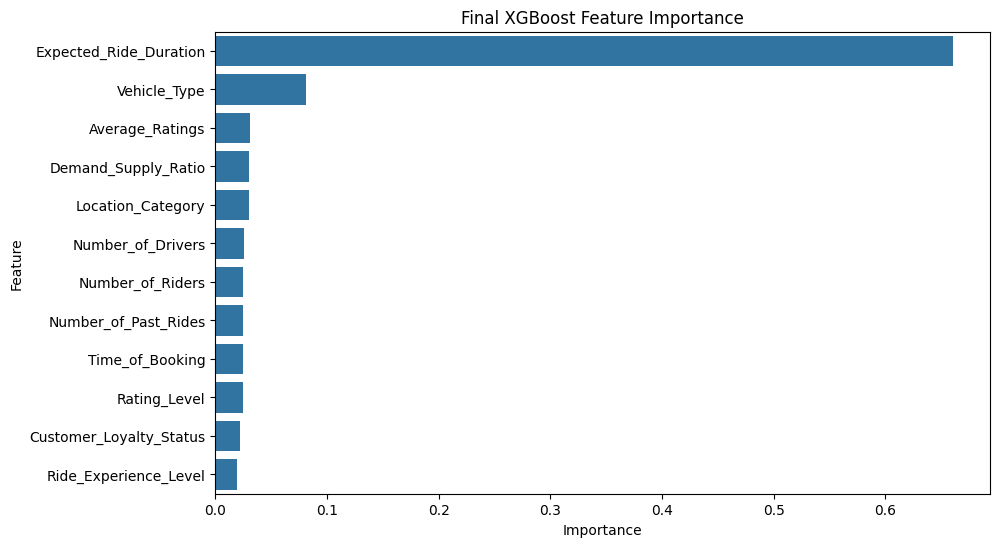

In [55]:
xgb_feature_importance = final_model_xgb.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': xgb_feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Final XGBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Insight: fetaure importance highest is `Expected_Ride_Duration`, and lowest is `Ride_Experience_Level`

### Random Forest

Tuning a Random Forest model involves optimizing its hyperparameters to enhance its predictive performance while balancing bias and variance. Random Forest is an ensemble learning method that builds multiple decision trees and aggregates their predictions to improve accuracy and robustness. By fine-tuning its parameters, we aim to maximize the model's ability to capture patterns in the data effectively.
In this project, we optimized the Random Forest Regressor to predict `Historical_Cost_of_Ride`. The final tuned model was configured with the following hyperparameters:

 - n_estimators: 200 (the number of trees in the forest, improving prediction stability).
 - max_depth: 15 (controls the maximum depth of each tree to prevent overfitting).
 - min_samples_split: 5 (the minimum number of samples required to split an internal node, controlling tree growth).
 - min_samples_leaf: 2 (the minimum number of samples required to be at a leaf node, ensuring meaningful splits).
 - max_features: 'sqrt' (limits the number of features considered at each split to the square root of total features, reducing overfitting).
 - random_state: 42 (ensures reproducibility).

In [56]:
final_rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42)

# Training model
final_rf_model.fit(x_train, y_train)

rf_pred_final = final_rf_model.predict(x_test)
rf_mape_final = mean_absolute_percentage_error(y_test, rf_pred_final)

print("Final Random Forest MAPE:", rf_mape_final)

Final Random Forest MAPE: 0.2243399108889901


Insight: from tuning model Random Forest we have MAPE 0.224/ 22.4%

In [57]:
# TreeExplainer for RandomForest
explainer_rf_tune = shap.TreeExplainer(final_rf_model)
shap_values_rf_tune = explainer_rf_tune.shap_values(x_test)

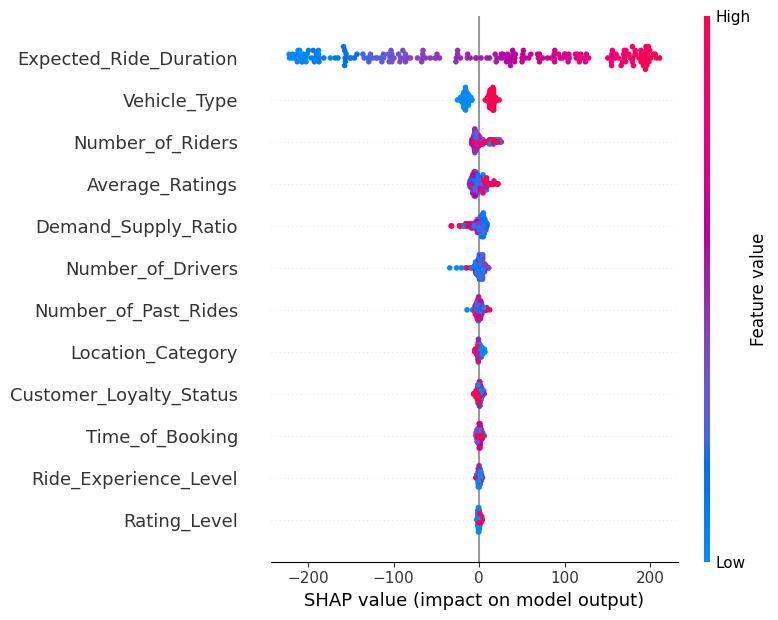

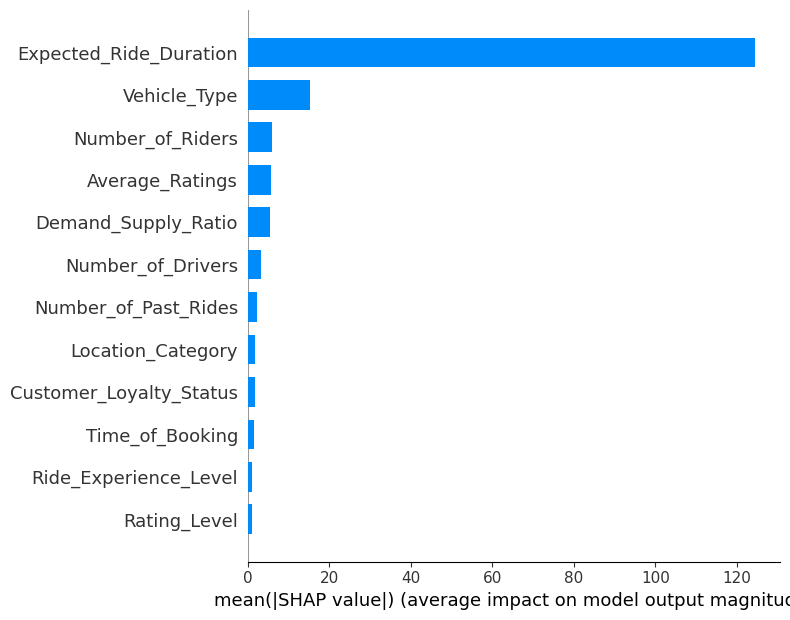

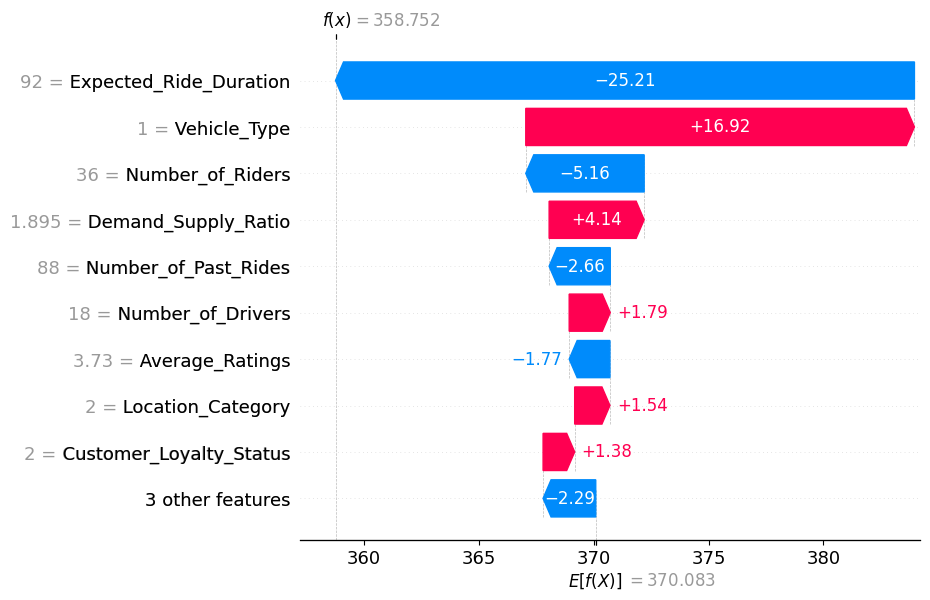

In [58]:
# SHAP summary plot
shap.summary_plot(shap_values_rf_tune, x_test)

# Bar plot of the most important features
shap.summary_plot(shap_values_rf_tune, x_test, plot_type="bar")

# Individualized explanation (e.g. 10th data)
shap.plots.waterfall(shap.Explanation(values=shap_values_rf_tune[10],
                                      base_values=explainer_rf_tune.expected_value,
                                      data=x_test.iloc[10]))

Insight: `Expected_Ride_Duration` and `Vehicle_Type` have highest feature importance, but from waterfall plot `Expected_Ride_Duration` decrease prediction value -25.21 and `Vehicle_Type` increase prediction value 16.21.

                    Feature  Importance
8    Expected_Ride_Duration    0.732771
9       Demand_Supply_Ratio    0.043742
5           Average_Ratings    0.042635
0          Number_of_Riders    0.039709
1         Number_of_Drivers    0.038041
4      Number_of_Past_Rides    0.037537
7              Vehicle_Type    0.016389
6           Time_of_Booking    0.013657
2         Location_Category    0.011002
3   Customer_Loyalty_Status    0.010995
10    Ride_Experience_Level    0.009116
11             Rating_Level    0.004406


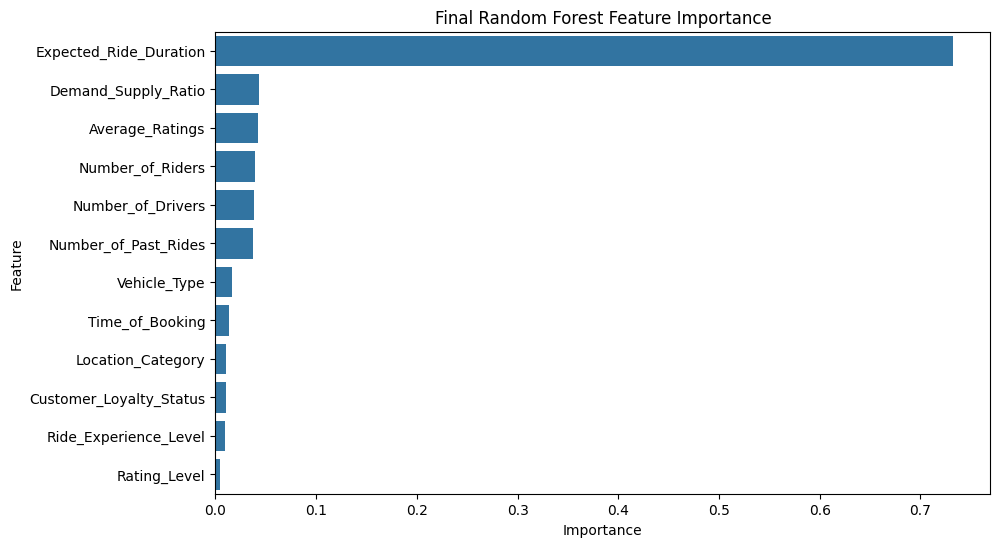

In [59]:
final_rf_feature_importance = final_rf_model.feature_importances_

# Create a DataFrame for better visualization
final_rf_feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': final_rf_feature_importance})
final_rf_feature_importance_df = final_rf_feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(final_rf_feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=final_rf_feature_importance_df)
plt.title('Final Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Insight: fetaure importance highest is `Expected_Ride_Duration`, and lowest is `Rating_Level`

### Gradient Boosting

Tuning a Gradient Boosting model is essential to enhance its predictive performance by optimizing hyperparameters. Gradient Boosting builds an ensemble of decision trees, where each new tree corrects the errors of its predecessors. By fine-tuning the model's hyperparameters, we can maximize its ability to capture complex data patterns and improve accuracy while minimizing overfitting.
In this project, we performed hyperparameter tuning on the Gradient Boosting Regressor to solve `Historical_Cost_of_Ride`. The final tuned model was configured with the following hyperparameters:

 - n_estimators: 200 (the number of boosting stages or trees in the model).
 - learning_rate: 0.1 (controls the contribution of each tree to the overall prediction, balancing accuracy and speed of convergence).
 - max_depth: 3 (limits the depth of each tree to prevent overfitting and control model complexity).
 - min_samples_split: 5 (the minimum number of samples required to split an internal node, affecting tree growth).
 - min_samples_leaf: 2 (the minimum number of samples required to be at a leaf node, ensuring generalization).
 - subsample: 0.8 (randomly samples a fraction of the training data for each tree to prevent overfitting).
 - random_state: 42 (ensures reproducibility).

In [60]:
final_gb_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=5,
    min_samples_leaf=2,
    subsample=0.8,
    random_state=42)

# Training model
final_gb_model.fit(x_train, y_train)

# Prediksi dan evaluasi
gb_pred_final = final_gb_model.predict(x_test)
gb_mape_final = mean_absolute_percentage_error(y_test, gb_pred_final)

print("Final Gradient Boosting MAPE:", gb_mape_final)

Final Gradient Boosting MAPE: 0.14225396273420127


Insight: from tuning model Gradient Boosting we have MAPE 0.142/ 14.2%

In [61]:
# TreeExplainer for Gradient Boosting
explainer_gb_tune = shap.TreeExplainer(final_gb_model)
shap_values_gb_tune = explainer_gb_tune.shap_values(x_test)

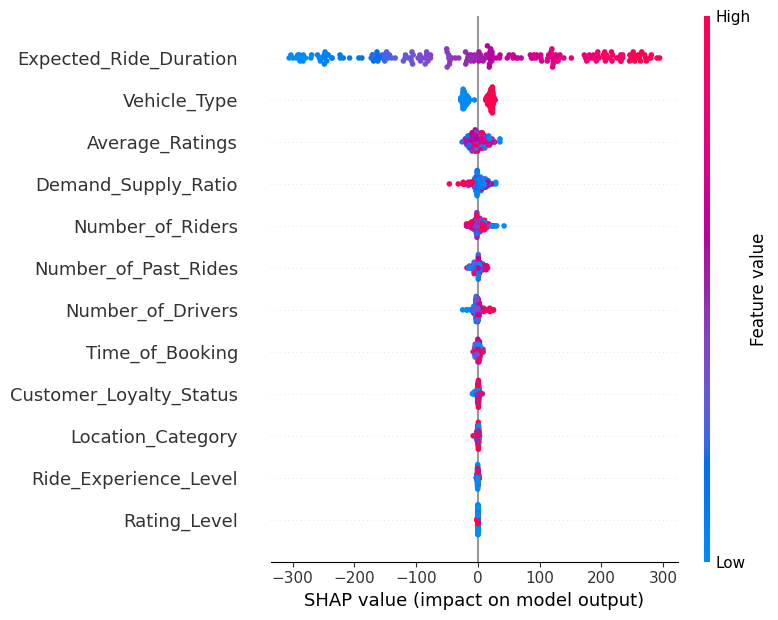

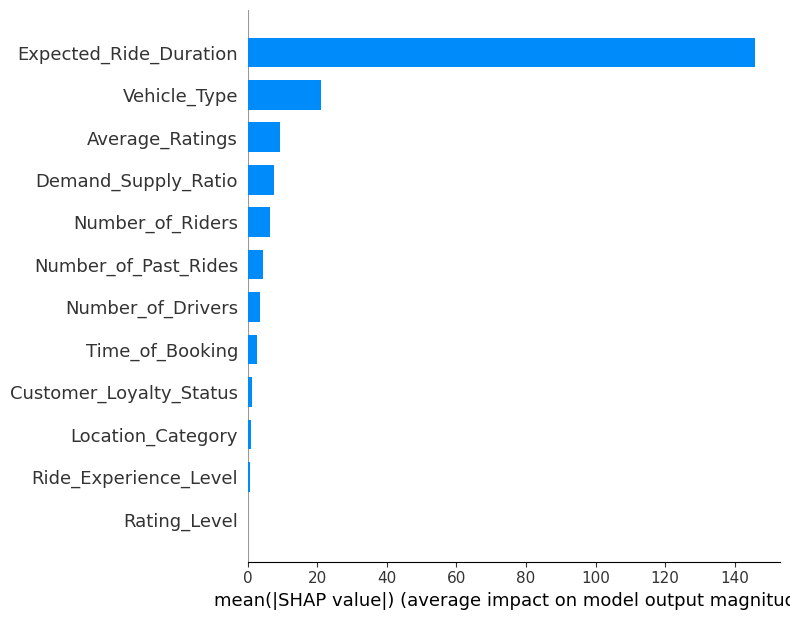

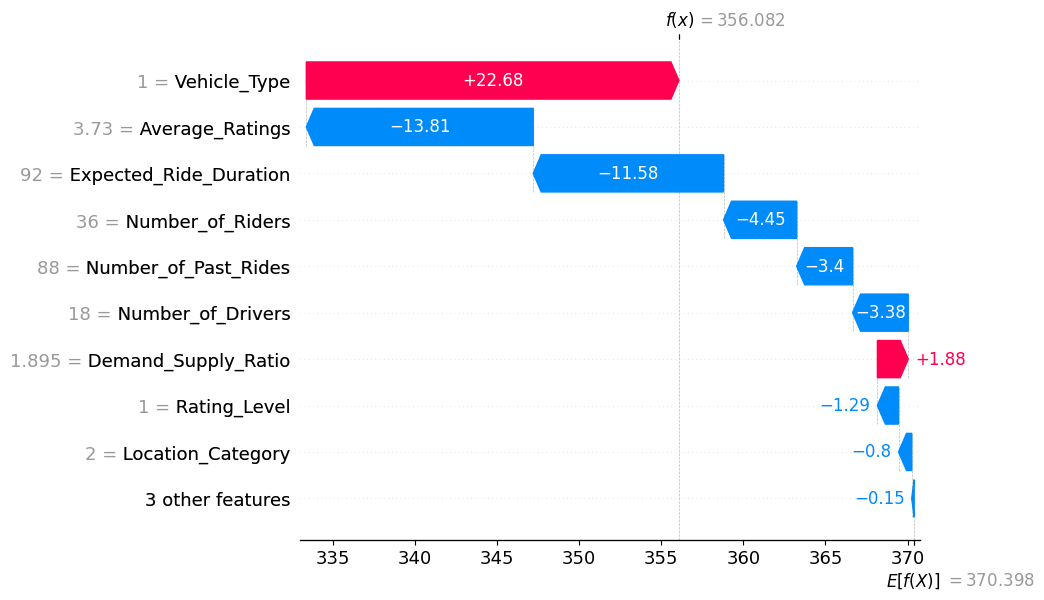

In [62]:
# SHAP summary plot
shap.summary_plot(shap_values_gb_tune, x_test)

# Bar plot of the most important features
shap.summary_plot(shap_values_gb_tune, x_test, plot_type="bar")

# Individualized explanation (e.g. 10th data)
shap.plots.waterfall(shap.Explanation(values=shap_values_gb_tune[10],
                                      base_values=explainer_gb_tune.expected_value,
                                      data=x_test.iloc[10]))

Insight: `Expected_Ride_Duration` and `Vehicle_Type` have highest feature importance, but from waterfall plot `Expected_Ride_Duration` decrease prediction value -13.81 and `Vehicle_Type` increase prediction value 22.68.

                    Feature  Importance
8    Expected_Ride_Duration    0.890655
5           Average_Ratings    0.022601
9       Demand_Supply_Ratio    0.020355
7              Vehicle_Type    0.016844
0          Number_of_Riders    0.015615
4      Number_of_Past_Rides    0.014323
1         Number_of_Drivers    0.009990
6           Time_of_Booking    0.005400
3   Customer_Loyalty_Status    0.001702
2         Location_Category    0.001520
10    Ride_Experience_Level    0.000927
11             Rating_Level    0.000067


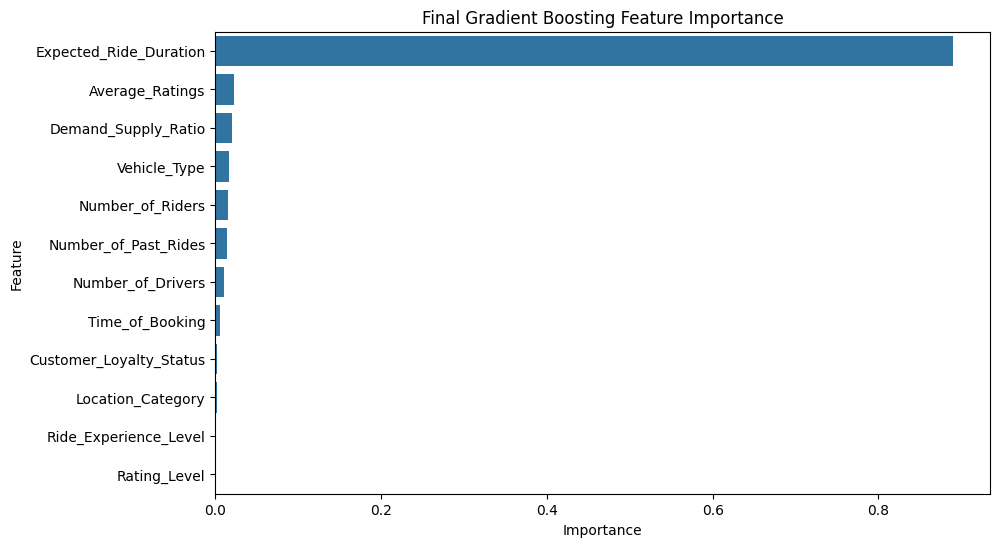

In [63]:
final_gb_feature_importance = final_gb_model.feature_importances_

# Create a DataFrame for better visualization
final_gb_feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': final_gb_feature_importance})
final_gb_feature_importance_df = final_gb_feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(final_gb_feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=final_gb_feature_importance_df)
plt.title('Final Gradient Boosting Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Insight: fetaure importance highest is `Expected_Ride_Duration`, and lowest is `Rating_Level`

### Ada Boost

Tuning an AdaBoost model involves optimizing hyperparameters to enhance its performance by combining multiple weak learners, typically decision trees, to build a strong predictive model. AdaBoost works by iteratively adjusting the weights of training samples, focusing more on those that are difficult to predict, thereby improving the model’s accuracy. Proper hyperparameter tuning is essential for achieving the best possible results, particularly when dealing with complex regression tasks.

In this project, we performed hyperparameter tuning on the AdaBoost Regressor to solve `Historical_Cost_of_Ride`. The final model was configured with the following hyperparameters:

 - estimator: DecisionTreeRegressor with max_depth of 5 (a shallow decision tree used as a weak learner in AdaBoost).
 - n_estimators: 300 (the number of boosting stages or weak learners to train).
 - learning_rate: 0.001 (controls the contribution of each weak learner, balancing learning speed and accuracy).
 - loss: 'linear' (defines the loss function used to minimize the prediction errors).
 - random_state: 42 (ensures reproducibility)

In [64]:
final_ada_model = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=5),
    n_estimators=300,
    learning_rate=0.001,
    loss='linear',
    random_state=42)

# Training model
final_ada_model.fit(x_train, y_train)

# Prediksi dan evaluasi
ada_pred_final = final_ada_model.predict(x_test)
ada_mape_final = mean_absolute_percentage_error(y_test, ada_pred_final)

print("Final AdaBoost MAPE:", ada_mape_final)

Final AdaBoost MAPE: 0.13307627585498777


Insight: from tuning model Ada Boost we have MAPE 0.133/ 13.3%

  0%|          | 0/10 [00:00<?, ?it/s]

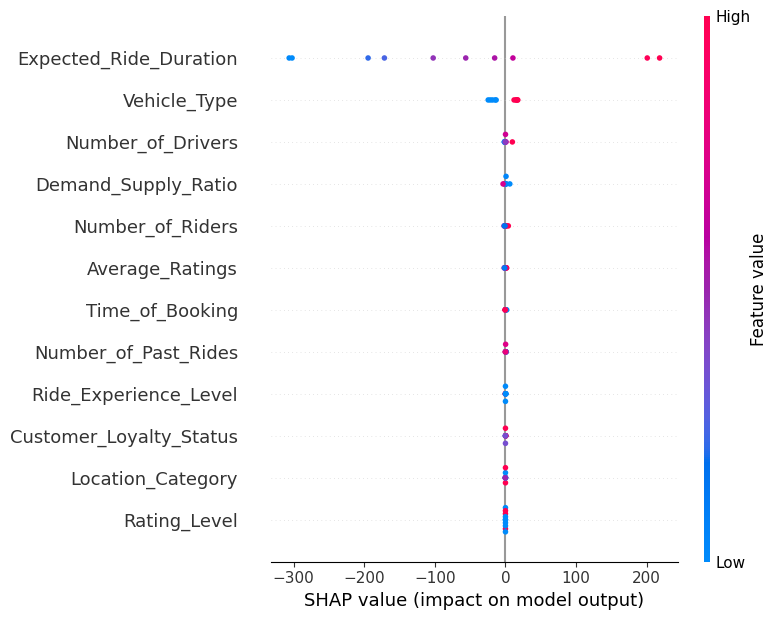

In [65]:
# Use partial data (for efficiency)
background = shap.sample(x_train, 100)

explainer_ada_tune = shap.KernelExplainer(final_ada_model.predict, background)
shap_values_ada_tune = explainer_ada_tune.shap_values(x_test[:10])  # take some first for efficiency

# Visualisasi
shap.summary_plot(shap_values_ada_tune, x_test[:10])

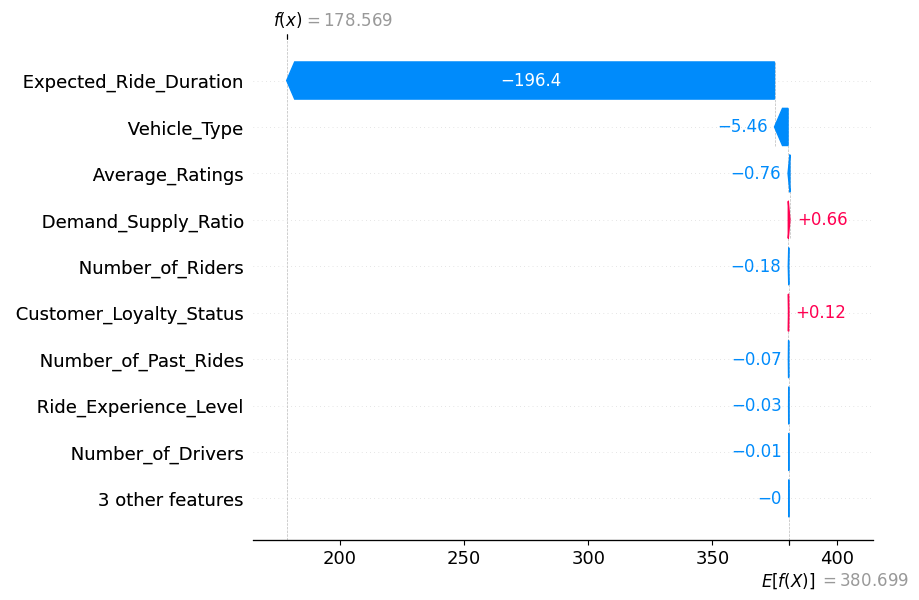

In [66]:
shap.plots._waterfall.waterfall_legacy(
    explainer_ada_tune.expected_value,
    shap_values_ada[0],
    feature_names=x_test.columns,
    features=x_test.iloc[0])

Insight: `Expected_Ride_Duration` and `Vehicle_Type` have highest feature importance, but from waterfall plot `Expected_Ride_Duration` decrease prediction value -196.4 and `Vehicle_Type` decrease prediction value -5.46.

                    Feature  Importance
8    Expected_Ride_Duration    0.954814
7              Vehicle_Type    0.012479
9       Demand_Supply_Ratio    0.007908
5           Average_Ratings    0.007405
4      Number_of_Past_Rides    0.004796
1         Number_of_Drivers    0.004736
0          Number_of_Riders    0.004018
6           Time_of_Booking    0.001303
3   Customer_Loyalty_Status    0.000826
10    Ride_Experience_Level    0.000808
2         Location_Category    0.000784
11             Rating_Level    0.000123


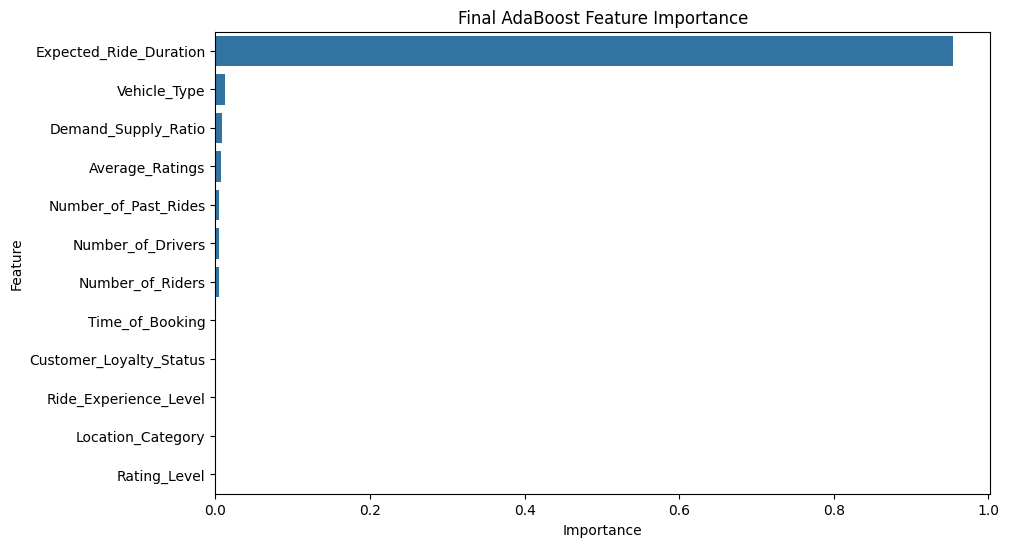

In [67]:
final_ada_feature_importance = final_ada_model.feature_importances_

# Create a DataFrame for better visualization
final_ada_feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': final_ada_feature_importance})
final_ada_feature_importance_df = final_ada_feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(final_ada_feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=final_ada_feature_importance_df)
plt.title('Final AdaBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Insight: fetaure importance highest is `Expected_Ride_Duration`, and lowest is `Rating_Level`

### Decission Tree

Tuning a Decision Tree model is a crucial step in optimizing its performance for regression tasks. Decision Trees are versatile algorithms that partition the feature space into smaller regions based on decision rules, but they can easily overfit the training data if not properly tuned. By adjusting hyperparameters, we aim to control the tree's complexity, improve its ability to generalize to unseen data, and avoid overfitting.

In this project, we tuned a Decision Tree Regressor to solve `Historical_Cost_of_Ride`. The final tuned model was configured with the following hyperparameters:

 - max_depth: 5 (limits the maximum depth of the tree to avoid overfitting and control complexity).
 - min_samples_split: 3 (the minimum number of samples required to split an internal node, which affects how the tree branches out).
 - min_samples_leaf: 4 (the minimum number of samples required at a leaf node, ensuring the model does not make overly specific splits).
 - max_features: None (uses all features for splitting, which may help capture all available information).
 - random_state: 42 (ensures reproducibility).

In [68]:
final_dt_model = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=3,
    min_samples_leaf=4,
    max_features=None,
    random_state=42)

# Training model
final_dt_model.fit(x_train, y_train)

# Prediksi dan evaluasi
dt_pred_final = final_dt_model.predict(x_test)
dt_mape_final = mean_absolute_percentage_error(y_test, dt_pred_final)

print("Final Decision Tree MAPE:", dt_mape_final)

Final Decision Tree MAPE: 0.14671920738527033


Insight: from tuning model Decission Tree we have MAPE 0.146/ 14.6%

In [71]:
# TreeExplainer for Decision Tree
explainer_dt_tune = shap.TreeExplainer(final_dt_model)
shap_values_dt_tune = explainer_dt_tune.shap_values(x_test)

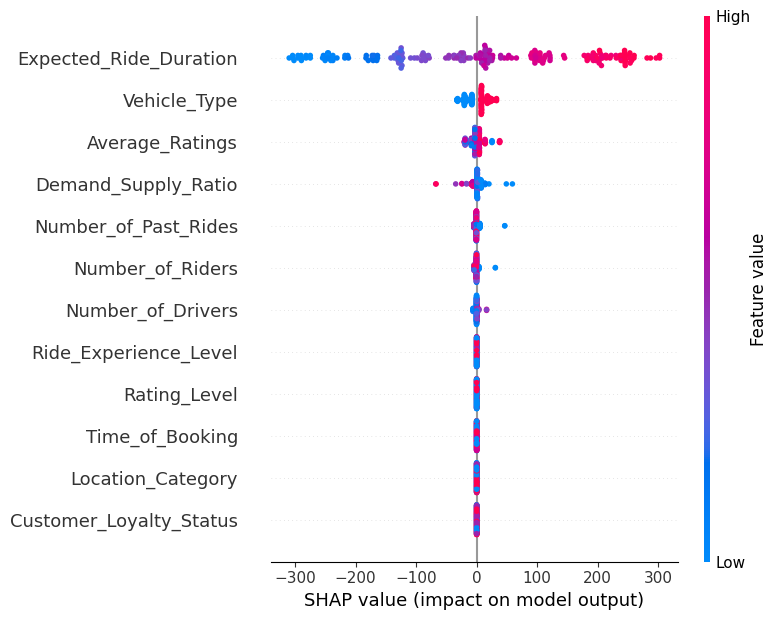

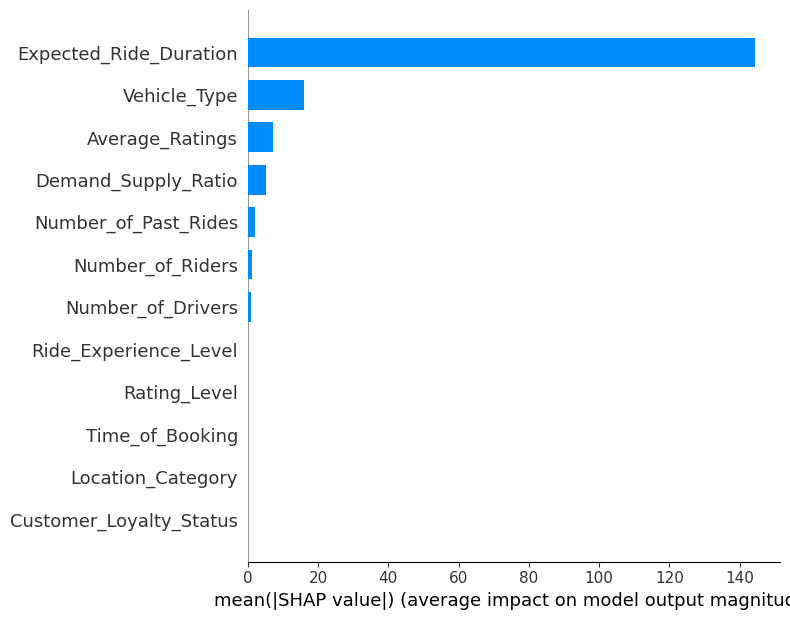

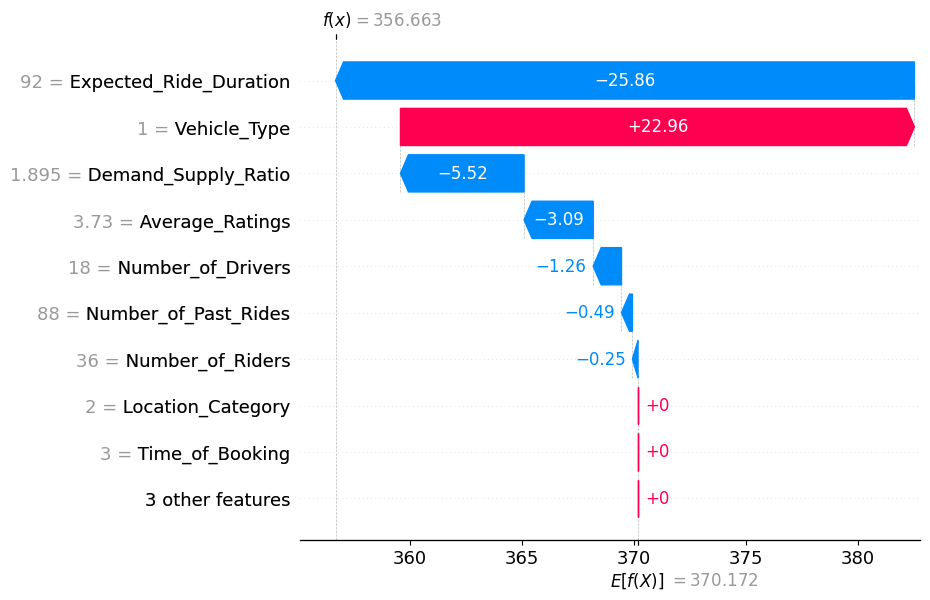

In [72]:
# SHAP summary plot
shap.summary_plot(shap_values_dt_tune, x_test)

# Bar plot of the most important features
shap.summary_plot(shap_values_dt_tune, x_test, plot_type="bar")

# Individualized explanation (e.g. 10th data)
shap.plots.waterfall(shap.Explanation(values=shap_values_dt_tune[10],
                                      base_values=explainer_dt_tune.expected_value,
                                      data=x_test.iloc[10]))

Insight: `Expected_Ride_Duration` and `Vehicle_Type` have highest feature importance, but from waterfall plot `Expected_Ride_Duration` decrease prediction value -25.86 and `Vehicle_Type` increase prediction value 22.96.

                    Feature  Importance
8    Expected_Ride_Duration    0.962691
7              Vehicle_Type    0.013085
9       Demand_Supply_Ratio    0.010047
5           Average_Ratings    0.009425
4      Number_of_Past_Rides    0.002598
0          Number_of_Riders    0.001546
1         Number_of_Drivers    0.000609
2         Location_Category    0.000000
3   Customer_Loyalty_Status    0.000000
6           Time_of_Booking    0.000000
10    Ride_Experience_Level    0.000000
11             Rating_Level    0.000000


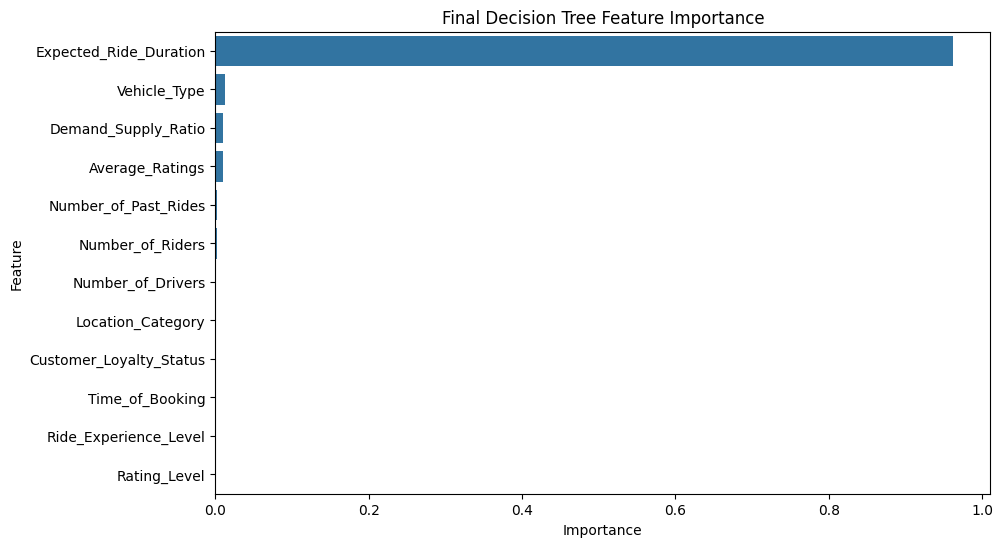

In [73]:
dt_feature_importance = final_dt_model.feature_importances_

# Create a DataFrame for better visualization
dt_feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': dt_feature_importance})
dt_feature_importance_df = dt_feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(dt_feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=dt_feature_importance_df)
plt.title('Final Decision Tree Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Insight: fetaure importance highest is `Expected_Ride_Duration`, and lowest is `Rating_Level`

## Evaluation

Compare all MAPE Score

In [74]:
mape_scores_final = {
    "Final XGBoost": final_mape_xgb,
    "Final Random Forest": rf_mape_final,
    "Final Gradient Boosting": gb_mape_final,
    "Final AdaBoost": ada_mape_final,
    "Final Decision Tree": dt_mape_final
}

# Find the model with the lowest MAPE
best_final_model = min(mape_scores_final, key=mape_scores_final.get)
best_final_mape = mape_scores_final[best_final_model]

# Print the MAPE scores for all final models
print("\nFinal MAPE Scores:")
for model, mape in mape_scores_final.items():
    print(f"{model}: {mape}")

# Print the best final model and its MAPE
print(f"\nBest Final Model: {best_final_model} with MAPE: {best_final_mape}")


Final MAPE Scores:
Final XGBoost: 0.14799520994689863
Final Random Forest: 0.2243399108889901
Final Gradient Boosting: 0.14225396273420127
Final AdaBoost: 0.13307627585498777
Final Decision Tree: 0.14671920738527033

Best Final Model: Final AdaBoost with MAPE: 0.13307627585498777


Best Final Model is AdaBoost with MAPE 0.133/ 13.3%

## Dynamic Pricing

Dynamic pricing is a strategy where prices are adjusted in real time based on various factors, such as demand, time, or customer-specific attributes. This approach is widely used in industries like transportation, hospitality, and e-commerce to maximize revenue and adapt to changing market conditions. In this project, we implemented a dynamic pricing model for `Expected_Ride_Duration`

In [75]:
def dynamic_pricing_adjusted(row):
    row_for_prediction = pd.DataFrame([row.drop('Dynamic_Price_Adjusted', errors='ignore')])

    # Sort the columns like a training model
    row_for_prediction = row_for_prediction[final_ada_model.feature_names_in_]

    base_price = final_ada_model.predict(row_for_prediction)[0]

    if row['Expected_Ride_Duration'] < 15:
        base_price *= 0.9
    elif row['Expected_Ride_Duration'] > 45:
        base_price *= 1.2

    if row['Time_of_Booking'] == 1:  # evening
        base_price *= 1.15
    elif row['Time_of_Booking'] == 2:  # night
        base_price *= 1.25

    if row['Vehicle_Type'] == 2:  # premium
        base_price *= 1.10

    return round(base_price, 2)

x_test = x_test.copy()

# Apply dynamic pricing
x_test['Dynamic_Price_Adjusted'] = x_test.apply(dynamic_pricing_adjusted, axis=1)

print(x_test[['Dynamic_Price_Adjusted']].head())

    Dynamic_Price_Adjusted
1                   191.62
4                   676.37
13                  399.95
14                  487.12
20                   88.87


In [76]:
x_test['Cost_of_Ride_Pred'] = pd.DataFrame(ada_pred_final)

After we get `Dynamic_Price_Adjusted` we can find revenue, on this bellow

In [77]:
x_test['revenue'] = x_test['Dynamic_Price_Adjusted'] - x_test['Cost_of_Ride_Pred']

total_revenue = x_test['revenue'].sum()
total_cost = x_test['Cost_of_Ride_Pred'].sum()

revenue_percent = (total_revenue / total_cost) * 100

print(f"Total Revenue: {total_revenue:.2f}")
print(f"Total Cost: {total_cost:.2f}")
print(f"Revenue as Percentage of Cost: {revenue_percent:.2f}%")

Total Revenue: 2643.28
Total Cost: 16148.01
Revenue as Percentage of Cost: 16.37%


## Conclusion

From plot we can have `Expected_Ride_Duration` linier with `Historical_Cost_of_Ride`, for feature impotance from all model we find `Expected_Ride_Duration` highest value. AdaBoost model find MAPE smallest is  0.133/ 13.3%. For dynamic pricing, we use feature `Expected_Ride_Duration`, `Time_of_Booking` and `Vehicle_Type`. We get revenue 2643.28 or 16.37%

## Reference

1. https://xbe.at/
2. https://scikit-learn.org/stable/supervised_learning.html
3. https://www.analyticsvidhya.com/
4. https://www.kaggle.com/datasets/arashnic/dynamic-pricing-dataset/code

## Contact

[Linkedin](http://linkedin.com/in/muh-amri-sidiq)